# Introduction

_**AI**_: the set of tasks in which a computer can make decisions. To create machines that can think of themselves, mimic human intelligence and behaviour. 

_**ML**_: part of AI; using algorithm-based models which, <u>based on data</u>, create rules to then make decisions based on the data / previous experience. 

_**Deep Learning**_: the field of ML that uses stacks of layers for data processing and model building. They use algorithms such as Neural Networks, deep bayesian networks, deep random forest. NN are modelled after the way neurons are organised (but not after the way the brain works). 

**History**:
- The term "AI" was coined in 1956 at Dartmouth College conference; 
- 1958 - perceptron (by Frank Rosenblatt): first supervised ML machine which classified triangles and circles. 
- 1974 - 1980: AI winter
- 1980-1987: boom
- 1987 - 1993: the second AI winter
- AI revolution: 
  - 1997: Deep Blue beat the chess champion Garry Kasparov; 
  - Two reasons: computing power and data (due to the internet and social media)


The **Remember-Formulate-Predict** framework of ML:
1. Remember: read data / experience; 
2. Formulate: create a model by establishing some rules; 
3. Predict: use the model to predict future data; 

Basic terms and definitions: 

| Term | Definition |
| - | - |
| Attribute | Basically the same as feature/variable (e.g. "Mileage") |
| Feature (predictor variable) | Any property / characteristic of the data that the model can use to make predictions. An indepenent variable. |
| Label | A special feature that a ML model predicts from the other features. A dependent variable. |
| Labeled data | Data that contains a special feature - label - that we aim to predict. | 
| Unlabeled data | Doesn't contain this special feature. |
| Model | A set of rules built/defined by a specific algorithm that represent our data and can be used to make predictions, e.g. to predict a label from features. |
| Prediction | An output of a model. |
| $\hat{y}$ | A predicted label. |
| Parameters | Weights, biases of ML models (think of weights and bias of a linear regression model). Depend on the training data. Parameters are saved as part of the final model. |
| Hyperparameters | A parameter of a learning algorithm (rather than the model), which doesn't depend on the training data and values are not saved as part of the final model. Examples - Learning rate, # of epochs used during the model training, max_depth of a tree, n_layers for a NN, etc.. |


ML systems can be classified based on:
1. Whether the models are trained with human supervision: <u>supervised, unsupervised, semisupervised, and reinforcement learning</u>;
2. Whether they can learn incrementally (on the fly) from the stream of oncoming data: <u>online vs batch learning</u>;
   1. **Batch learning**: system must be trained offline (offline learning) and then launched into production, not learning anymore.
   2. **Online / incremental learning**: the system trains incrementally by feeding it data instances sequentially. For example, it can be taught with train data and then learning step as it runs with new data.  This system can be taught with train data, then launched into production (online), and keep learning from new data it received;
   3. Incremental learning is useful for **out-of-core learning**, i.e. train systems on huge datasets that cannot fit in one machine's main memory by training the system on small portions of the dataset at one time. Here, the system trains offline (before production), but trains at small chunks of the large dataset at any one time. 
3. Whether they work by comparing new data points to known data points or detect patterns in training data and build a predictive model: <u>instance-based vs model-based learning</u>
   1. **Instance-based model**: these learning algorithms rely on a similarity measure to make predictions; e.g. k-Nearest Neighbors
   2. **Model-based model**: e.g. linear model (linear regression);



<u>Branches of ML based on the amount and type of supervision they get during training</u>:

- **Supervised ML**: learning with labelled data. Types of supervised ML models:
  - **Regression models**: predict numerical data (output - number). 
  - <u>Examples</u>: Simple Linear Regression, Multiple Linear Regression, Polynomial Regression, Support Vector Regression, Decision Tree Regression, Random Forest Regression, Lasso Regression.
  - **Classification models**: predict categorical data (output - category). 
  - <u>Examples</u>: Discrete Perceptron, Continuous Perceptron (Logistic Classifier), Naive Bayes, K-Nearest Neighbours, SVM (Support Vector Machines), Kernel SVM, Decision Trees for classification, Neural Networks, ensemble methods (Random Forest).
- **Unsupervised ML**: learning without training labels; cannot calculate accuracy scores. Branches:
  - **Clustering**: can be used to reduce the number of rows. Algorithms: K-Means, DBSCAN, Hierarchical Cluster Analysis (HCA), Gaussian mixture model. 
  - **Anomaly and novelty detection**: can be used to prevent fraud, catch manufacturing defect. Algorithms: One-class SVM, Isolation Forest;
  - **Dimensionality reduction and visualisation**: can be used to reduce the number of columns. Algorithms: Principal Component Analysis (PCA), Locally-Linear Embedding (LLE), t-distributed stochastic neighbor embedding (t-SNE), UMAP, kernel PCA; 
  - **Generative learning**: models that, given a dataset, can output new data points that look like the original dataset. Examples: generative adversarial networks (GANs) - Ian Goodfellow; variational autoencoders; restricted Boltzmann machines. 
- **Semi-supervised ML**: examples include Deep Belief Networks (DBN).
- **Reinforcement ML**: no data given to the model - model receives an environment with rewards and punishments. ML system (agent) observes the environment, performs actions, and gets rewards/penalties in return. An agent must itself find the best strategy (policy).

Some areas of ML have their specific sub-branches, combining the above-mentioned algorithms and supervision approaches:
- **Deep Learning**: uses Neural Networks; a sub-branch of ML. 
- **Computer Vision**: a large area of ML classification. 
- **NLP**: sentiment classification (e.g. recognising positive vs negative opinions)

<u>ML systems</u>:
- Can the system learn incrementally from a stream of continuous data: batch/offline (cannot) vs online training;
- Instance-based vs model-based; 

<u>ML frameworks in Python</u>:
- Scikit-learn
- Pytorch
- Keras
- TensorFlow
- spaCy (for NLP)

# Data and model


**Data split**

- 60% training set: for training our models; 
- 20% validation set: for making decisions on which model to use and adjusting hyperparameters; 
- 20% testing set: checking how well our model did; 

Classic simple test: 80% train - 20% test;

---

Model selection / evaluation: 

method 1/ **Holdout validation**: 
- train multiple models with various hyperparameters on training set; 
- select the model that performs the best on the validation test; 
- after holdout validation process, you train the best model on the full training set (train + validation sets); 
- evaluate the final model on test set, to get an estimation of generalization error; 

method 2/ **K-fold cross-validation**: use small validation sets; 
- out of the train+validation set, make multiple samples of train and validation of models on differently-selected sets, then get average performance on all the folds; 

---

Hyperparameter tuning (Finetuning the model):

1/ GridSearchCV

Will evaluate all the possible combinations of hyperparameter values that you specify by using cross-validation. 

2/ Randomized Search

Preferable to use this one when the hyperparameter search space is large (i.e. there are lots of hyperparameters to check).



In [20]:
# Manual implementation of cross-validation

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import pandas as pd

df = pd.DataFrame({
	'feature1': [i for i in range(100)],
	'feature2': [i for i in range(500, 600)],
	'label': ['0' for i in range(50)] + ['1' for i in range(50)]
})

features, labels = df[['feature1','feature2']], df['label']
labels

skfolds = StratifiedKFold(n_splits=3)

# In skfolds.split, you HAVE to provide X and y
for i, (train_index, test_index) in enumerate(skfolds.split(features, labels), 1):
	print(f"\n-----\nFold {i}\n-----\n")
	features_fold_train = features.iloc[train_index]
	labels_fold_train = labels[train_index]
	print(train_index)
	print(features_fold_train)
	#
	features_fold_test = features.iloc[test_index]
	labels_fold_test = labels[test_index]
	print(test_index)
	print(features_fold_test)
	# clone_clf.fit(features_fold_train, labels_fold_train)
	# y_pred = clone_clf.predict(features_fold_test)
	# n_correct = sum(y_pred == labels_fold_test)

# print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495



# the above code does the same as `cross_val_score`
# from sklearn.model_selection import cross_val_score
# cross_val_score(ML_model, X_train, y_train, cv=3, scoring="accuracy")


-----
Fold 1
-----

[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81
 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
    feature1  feature2
17        17       517
18        18       518
19        19       519
20        20       520
21        21       521
..       ...       ...
95        95       595
96        96       596
97        97       597
98        98       598
99        99       599

[66 rows x 2 columns]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65 66]
    feature1  feature2
0          0       500
1          1       501
2          2       502
3          3       503
4          4       504
5          5       505
6          6       506
7          7       507
8          8       508
9          9       509
10        10       510
11        11       511
12        12       512
13        13       513
14        14       514
15   

'\nthe above code'

## Datasets

In [1]:
# datasets loaded from sklearn have the following keys:
# - DESCR: describes the dataset;
# - data: multidimensional array of features;
# - target: array with labels; 

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
print( mnist.keys() )
X, y = mnist['data'], mnist['target']
print(X.shape, y.shape) # 70,000 images, 784 features each (28x28 pixels), each pixel is represented by intensity of color - white / 0 and black / 255.


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
(70000, 784) (70000,)


In [17]:
# Some datasets
from sklearn import datasets

boston = datasets.load_boston();
# features / labels
X, y = boston.data, boston.target
print(X.shape, y.shape)
print(boston.feature_names)
print(boston.data[:3])
print(boston.target[:3])

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]
[24.  21.6 34.7]


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [18]:
from sklearn import datasets
import pandas as pd

df0 = datasets.load_boston()

X = df0.data
print(X.shape);

y = df0.target
print(y.shape);

print(df0)
# Add features
df = pd.DataFrame(df0.data, columns=df0.feature_names)
# Add labels
df['Target'] = pd.Series(df0.target)
df

(506, 13)
(506,)
{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [19]:
import pandas as pd
from sklearn import datasets

diabetes = datasets.load_diabetes()
diabetes
print(diabetes.data[:3])
print(diabetes.target[:3])

df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['Target'] = pd.Series(diabetes.target)
df_diabetes

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]]
[151.  75. 141.]


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [6]:
from tensorflow import keras

keras.datasets??

Type:        module
String form: <module 'keras.api._v2.keras.datasets' from 'c:\\Users\\evgen\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\__init__.py'>
File:        c:\users\evgen\appdata\local\programs\python\python310\lib\site-packages\keras\api\_v2\keras\datasets\__init__.py
Source:     
# This file is MACHINE GENERATED! Do not edit.
# Generated by: tensorflow/python/tools/api/generator/create_python_api.py script.
"""Small NumPy datasets for debugging/testing.
"""

import sys as _sys

from keras.api._v2.keras.datasets import boston_housing
from keras.api._v2.keras.datasets import cifar10
from keras.api._v2.keras.datasets import cifar100
from keras.api._v2.keras.datasets import fashion_mnist
from keras.api._v2.keras.datasets import imdb
from keras.api._v2.keras.datasets import mnist
from keras.api._v2.keras.datasets import reuters


In [100]:
"""
from tensorflow import keras

keras.datasets
keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
keras.datasets.fashion_mnist
"""

'\nfrom tensorflow import keras\n\nkeras.datasets\nkeras.datasets.mnist\n(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()\nkeras.datasets.fashion_mnist\n'

## Train-test split

```py
# Simple train-test random split
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
	housing, 
	test_size=0.2, 
	random_state=42 # parameter that allows you to set the random generator seed
)
```

In [4]:
# There is also stratified split, based on stratified sampling (see statistics)

import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[10,20],[30,40],[10,20],[70,80],[100,30],[10,20],[30,40],[10,20],[70,80],[100,30], [31,41],[11,21],[31,41],[11,31],[71,31],[31,41],[11,21],[31,41],[11,31],[71,31]])
y = np.array([0,0,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1,1])

# Create an object
sss = StratifiedShuffleSplit(
    n_splits=1, 
    test_size=0.2, 
    random_state=69
)
# sss.get_n_splits(X, y)
for train_ind, test_ind in sss.split(X, y):
    train = X[train_ind]
    test = X[test_ind]

print(train)
print('\n')
print(test)


[[ 31  41]
 [ 70  80]
 [ 10  20]
 [ 10  20]
 [ 70  80]
 [100  30]
 [ 30  40]
 [ 71  31]
 [ 31  41]
 [ 71  31]
 [ 11  21]
 [ 31  41]
 [ 11  31]
 [ 11  21]
 [100  30]
 [ 10  20]]


[[11 31]
 [30 40]
 [31 41]
 [10 20]]


In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

np.random.seed(42)

df = pd.DataFrame({
    'X1': np.random.random(size=(100)),
    'X2': np.random.random(size=(100)),
    'y': ['1' for i in range(0, 90)] + [ '2' for i in range(90, 100)]
})

# Check that the data is, indeed, imbalanced
print( df['y'].value_counts() )
print('-'*50)

sss = StratifiedShuffleSplit(
    n_splits=1,
    test_size=0.2,
    random_state=69
)

for train_index, test_index in sss.split( df, df['y'] ):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

print( strat_train_set['y'].value_counts() )
print( strat_test_set['y'].value_counts() )

strat_train_set

1    90
2    10
Name: y, dtype: int64
--------------------------------------------------
1    72
2     8
Name: y, dtype: int64
1    18
2     2
Name: y, dtype: int64


,X1,X2,y
57,0.195983,0.761620,1
8,0.601115,0.228798,1
51,0.775133,0.239562,1
34,0.965632,0.942910,1
76,0.771270,0.690938,1
...,...,...,...
68,0.074551,0.040775,1
85,0.325183,0.659984,1
36,0.304614,0.518791,1
35,0.808397,0.323203,1


## Pre-processing

**Data preprocessing**

These are different transformations that are applied to data for better ML model development.

| Technique | Description | Application | Picture |
| - | - | - | - |
| **Imputation** | Handling missing values. | If 70% of the data is missing - drop the column; if less, can drop rows or substitute. Else - imputation, e.g. with the median value for the feature. | |
| **Binning** | Converting continuous feature to categorical. | Binning is useful when your data is noisy, i.e. lots of values weren't recorded precisely. Also, it can be useful to prevent the model overfitting the data. However, you lose information. | |
| **Variable convertion into numerical values** | If we have a **categorical ordinal** feature, then we can simply convert each group into a value as per its order and use as is in the training process. | E.g. in a variable *customer experience*, groups *Bad*, *Mediocre*, *Good* can roughly be converted to *1*, *2*, and *3*, respectively. | |
| **One-hot encoding** | <u>Transform one **categorical nominal** feature to a set of binary *dummy* variables</u>, where each unique category from the original feature is spread out to column name. | Uses: <ul><li>To train regression model on categorical features / variables;</li><li>To prevent the ML algorithm from assigning values to the feature categories, which may make it seem as if one feature is "greater" than the other</li></ul> | <img src="Media/one-hot-encoding.png" width="700px"> |
| **Feature scaling** | It is a technique to standardize the independent variables of the dataset in a specific range. | Very important as ML algorithms don't perform well when the input numerical features have very different scales. For example, if one feature ranged from 1 to 100,000, and another one ranges only from 10 to 100, it is crucial to standardize them both to the same standard range, e.g. from 0 to 1. | |

```py
# One-hot encoding in Pandas
pd.get_dummies(house['PropertyType']).head()
pd.get_dummies(house['PropertyType'], drop_first=True).head()

```

In [1]:
import pandas as pd

df = pd.DataFrame({
	'feature 1': [1,2,3,4,5,6,7],
	'weekday': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
})
df

,feature 1,weekday
0,1,Monday
1,2,Tuesday
2,3,Wednesday
3,4,Thursday
4,5,Friday
5,6,Saturday
6,7,Sunday


In [3]:
# One-hot encoding
df1 = df.copy()

weekday_columns = pd.get_dummies(df1['weekday'])
print(weekday_columns)
df1 = pd.concat([df1, weekday_columns], axis=1)
df1 = df1.drop(['weekday'], axis=1)
df1


   Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       0       1         0       0         0        0          0
1       0       0         0       0         0        1          0
2       0       0         0       0         0        0          1
3       0       0         0       0         1        0          0
4       1       0         0       0         0        0          0
5       0       0         1       0         0        0          0
6       0       0         0       1         0        0          0


,feature 1,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,1,0,0,0,0,0
1,2,0,0,0,0,0,1,0
2,3,0,0,0,0,0,0,1
3,4,0,0,0,0,1,0,0
4,5,1,0,0,0,0,0,0
5,6,0,0,1,0,0,0,0
6,7,0,0,0,1,0,0,0


In [6]:
# Binning
import pandas as pd

df = pd.DataFrame({
	'f1': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
})

df['f1_categorical'] = pd.cut(
    df['f1'],
    bins=[0, 5, 10, 15],
    labels=[1,2,3]
)

df

,f1,f1_categorical
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,2
6,7,2
7,8,2
8,9,2
9,10,2


## Imbalanced data

What if a label of interest is rare?

| Technique | Description |
| - | - |
| Undersample (downsample) | In the data, use fewer of the more prevalent label. |
| Oversample (upsample) | Use more of the rare labels. Can be done by bootstrapping (draw additional rows with replacement). |
| Data Generation | Generate new data for the rare labels that are a little different from the existing rare datapoints. |
| Upweight, downweight | Assigning an additional weight to the rare label entries. |



## Feature engineering

Feature engineering refers to coming up with features that would be useful for your particular ML model to be trained on. It involves:
- Feature selection;
- Feature extraction: combining existing features to produce a more useful one, e.g. PCA;
- Creating new features by gathering more data; 



## Save ML model

*Method 1*

```py
import pickle

# Let's say that you have a trained model with an object instance called "model"
model = LogisticRegression()
model.fit(X_train, Y_train)
# You can save it using a module called "pickle"
pickle.dump(model, open('filename.sav', 'wb'))
# ...
# Later, you can load the model from a file (even if you are working in another file)
model = pickle.load(open('filename.sav', 'rb'))
result = loaded_model.score(X_test, Y_test)

```

*Method 2*
```py
from sklearn.externals import joblib

joblib.dump(ML_model, "ML_model.pkl")
# load the model later
ML_model = joblib.load("ML_model.pkl")
```


# Activation functions

| Function | Description | Equation | Plot | 
| - | - | - | - |
| **Step function** | Returns a boolean: 1 if the output is nonnegative and 0 if the output is negative. | $$f(x)=\begin{cases} 0,&x < 0 \\ 1,&x\ge 0 \end{cases}$$ | <img src="Media/step.png" width="300px"> |
| **Sigmoid function** ($\sigma$) | Below is the sigma function. Both are equivalent, but the one with $e^x$ in the numerator behaves better with small floating point numbers. Produces a probability. | $$ \sigma(x) = \frac{1}{1 + e^{-x}} $$ $$ \sigma(x) = \frac{ e^{x} }{1 + e^{x}} $$ | <img src="Media/sigmoid.png" width="300px"> |
| **Tanh (Hyperbolic tangent)** |  | $$tanh(x)=\frac{ e^{x} - e^{-x} }{ e^{x} + e^{-x} }$$ | <img src="Media/tanh.png" width="300px"> |
| **Softmax** |  |  |  |
| **ReLU (Rectified linear unit)** | For x >= 0, ReLU(x) = x, and for x < 0, ReLU(x) = 0.  | $$ReLU(x)=\begin{cases} 0, & x<0 \\ x, & x\ge 0 \end{cases}$$ | <img src="Media/relu.png" width="300px"> |


In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Tanh function')

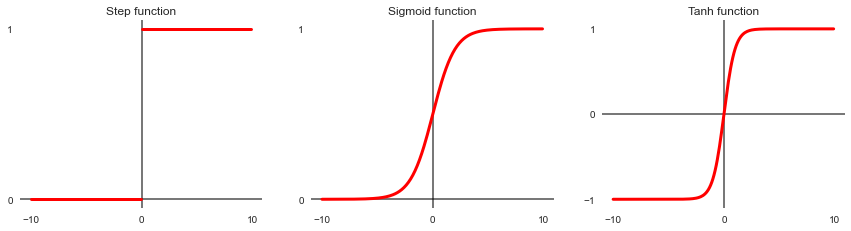

In [18]:
fig = plt.figure(figsize=(20,20))
sns.set_style('white', {
	'axes.spines.left':False,
	'axes.spines.right':False,
	'axes.spines.top':False,
	'axes.spines.bottom':False
})
sns.despine()
min_x, max_x = -10, 10

# Step function
ax = fig.add_subplot(5,4,1)
plt.axhline(0, color='black', alpha=0.7)
plt.axvline(0, color='black', alpha=0.7)
x1 = np.arange(min_x, 0, 0.1)
sns.lineplot( x=x1, y=0, color='red', linewidth=3 )
x2 = np.arange(0, max_x, 0.1)
sns.lineplot( x=x2, y=1, color='red', linewidth=3 )
plt.yticks([0,1]); plt.xticks([-10, 0, 10])
plt.title('Step function');

# Sigmoid function
ax = fig.add_subplot(5, 4, 2)
plt.axhline(0, color='black', alpha=0.7)
plt.axvline(0, color='black', alpha=0.7)
x1 = np.arange(min_x, max_x, 0.1)
# x2 = np.arange(0, 5, 0.1)
sns.lineplot( x=x1, y= 1/(1+math.e**(-x1)) , color='red', linewidth=3 )
plt.yticks([0,1]); plt.xticks([-10, 0, 10])
plt.title('Sigmoid function');


ax = fig.add_subplot(5, 4, 3)
plt.axhline(0, color='black', alpha=0.7)
plt.axvline(0, color='black', alpha=0.7)
x1 = np.arange(min_x, max_x, 0.1)
sns.lineplot( x=x1, y= (math.e**(x1)-math.e**(-x1))/(math.e**(x1)+math.e**(-x1)), color='red', linewidth=3 )
plt.yticks([-1,0,1]); plt.xticks([-10,0,10])
plt.title('Tanh function')

# Error functions

Also known as loss functions, cost function. A metric that tells us how our model is doing. 

| Type of error | Definition | How to overcome? |
| - | - | - |
| Underfitting | Training a model that is too simple. | Select a more powerful model with more parameters; feature engineering; reducing constraints on the model. |
| Overfitting | Training a model that is too complex and simply memorises the data. | Simplify the model - simplify algorithm, use fewer features; gather more training data; reduce the noise in the training data (e.g. by removing outliers and fixing data errors) |

d

| | underfit | proper fit | overfit |
| - | - | - | - |
| training error | HIGH | **LOW** | VERY LOW |
| validation error | HIGH | **LOW** | HIGH |




<u>Below is the table with the most important regression loss functions</u>:

In regression, residuals are calculated as: $residual = y_{actual} - y_{predicted}$.

These metrics below are basically ways to calculate the distance between two vectors - vectors of predicted and vector of target values.

The two popular metrics are MAE (Mean Absolute Error) and RMSE. 
| Metric name | Description | Use | Equation |
| - | - | - | - |
| **Absolute error** | Sum of the absolute values of the distances between data point and the line. | | $$ \sum( \mid y - \hat{y} \mid ) $$ |
| **Mean Absolute Error (MAE)** (Average Absolute Deviation) | Mean of the vertical distances from the points to the line. Correponds to the Manhattan norm (measures the distance between two points, e.g. in a city blocks, if you can only travel along orthogonal planes, so only horizontally or vertically). | Less sensitive to outliers, so use in data with tons of outliers. | $$ MAE = \frac{1}{n} \sum_{i=1}^{n} \mid y_{i}-\hat{y} \mid = \frac{ \sum_{i=1}^{n} abs(y_{i}-\hat{y}) }{ n } $$ |
| **Square error** | Sum of squares of distances. | | |
| **Mean Squared Error** | Mean of the squares of the distances. | | $$ error = \frac{1}{N} \sum_{i=1}^{N} (y_{i} - \hat{y})^{2} $$ |
| **RMSE / RMSD** (Root Mean Square Error) | Root of the mean square error; error around the regression line. Estimates the SD of y-values vertically; typical amount of errors of a model. $\hat{y}_{i}$ - predicted value; $y_{i}$ - actual value. The advantage of RMSE is that it has the same units as the prediction. $y = mx + b \pm RMSE$. Corresponds to the Euclidean norm (Euclidean distance - length of the straight-line distance between two points) | RMSE is more sensitive to outliers, so preferred when outliers are exponentially rare in the data (e.g. bell-shaped curve). | $$ RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^{2} } = \sqrt{ \frac{ \sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^{2} }{ n } } $$ |
| **RSE** | Residual standard error. The same as the root mean squared error, but adjusted for degrees of freedom. It's like RMSE but denominator is the degrees of freedom. | | $$ RSE = \sqrt{ \frac{ \sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^{2} }{ (n-p-1) } } $$ , where $p$ - number of predictors|


<u>In classification, the error functions are as follows:</u>

- Binary cross-entropy loss \ log loss
- Hinge loss

**Log loss**

A much more popular function. Uses probability. 

$$ LogLoss = -(y) ln(\hat{y}) - (1-y) ln(1 - \hat{y}) $$



# Accuracy metrics for Classification

**Accuracy** 

The percentage of times that a model is correct. 
$$\text{accuracy} = \frac{TP + TN}{\text{total cases}}$$

Accuracy can be assessed as a point estimate or with uncertainty intervals using K-fold cross-validation.

---
**False positive/negative**

- False positive (FP): a person is incorrectly classified as sick (positive lael), but is healthy (negative label).
- False negative (FN): a person is incorrectly classfied as healthy, when they are sick. 
- True positive (TP): sick person diagnosed as sick. 
- True negative (TN): a healthy person diagnosed as healthy. 

---

**The Confusion matrix**:

| Actual label \ Predicted label | Classifies as `1` | Classifies as `0` | Total |
| - | - | - | - |
| It is `1` | **8** (TP) | **17** (FN) | 25 |
| It is `0` | **2** (FP) | **73** (TN) | 75 |
| Total | 10 | 90 | 100 |

$accuracy = \frac{8+73}{100} = 81\% $

**Recall (sensitivity; true positive rate)**: the capacity of the test to identify the positively labeled points. Finds the proportion of correct predictions among the data points with the positive label. <u>Used for high recall models, where false negatives are much more expensive / harmful than false positives.</u> 
$$ Recall = \frac{TP}{TP + FN} $$

**Precision**: measures how well the model does with false positives. Out of data points classified as positive (1 label), how many are actually positive? <u>High precision models - models in which false positives are much more expensive / harmful than false negatives.</u>
$$ Precision = \frac{TP}{TP + FP} $$

**Specificity (true negative rate)**: the capacity of the test to identify the negatively-labeled points. 
$$ Specificity = \frac{TN}{TN + FP} $$

---

**The ROC curve**:

The receiver operating characteristic curve. 

It's a way to optimise sensitivity and specificity in a model. 

---

**AUC**

---

**The F-score**:

F-score is a metric that combines recall and precision. 

$F_{\beta}-score$

We need a metric that is like an average but that is closer to the minimum value of the two - *a harmonic mean*. 

$$ mean_{harmonic} = \frac{2ab}{a+b} $$

$F_{1}-score$ - the harmonic mean between the precision ($P$) and the recall ($R$):

$$ F_{1} = \frac{2PR}{P+R} $$

If one of the numbers is much lower than the other, the $F_{1}-score$ will be low and closer to the lower value. 

We can use $F_{\beta}$ is we care more about FP or FN. We use the parameter $\beta$ to finetune our metric to put more emphasis on recall or precision: 
- $\beta = 0$, we get full precision; 
- $\beta = 0.1$, we give more weight to precision; 
- $\beta = 1$, we consider recall and precision equally; 
- As $\beta$ is larger than 1 (for example, 2), we give more weight to recall; 
- $\beta = \inf$, we get full recall. 
- IOW, the lower the value of $\beta$, the more we emphasize precision, and the higher the more we emphasize recall. 

$$ F_{\beta} = \frac{ (1+\beta^{2})PR }{ \beta^{2}P+R } $$



# Supervised ML: Regression

Some definitions below:
| Term | Definition |
| - | - | 
| Weight | Factor by which we multiply each feature. If the weight is $0$, then this feature is irrelevant to predicting the label. |
| Bias | The constant in the formula that's not attached to any feature. |
| Simple linear regression | Uses one independent variable to predict dependent variable Y |
| Multiple linear regression | Uses two or more independent variables to predict the outcome |
| Univariate linear regression | We predict one label, e.g. $y = mx+b$ |
| Multivariate linear regression | We predict multiple labels. |
| Monotonic relationship | A relationship where two variables have the same sign of change, e.g. move in the same direction. This can be linear (two variables change at the same rate) or non-linear (change at different rates) |
| Interpolation | Predicting a value *within the range* of the data used for training. |
| Extrapolation | Predicting a value *beyond the range* of the data used for training. |

a

<img src="Media/Residuals.png" width="600"/>

**Simple linear regression**: relationship btw two variables. 

**Linear Model** - describes a continuous response variable as a function of one or more predictor variables. 

**Correlation** - enumerates direction and strength of a relationship. Enumerated by correlation coefficient. 

*Pearson's correlation coefficient (r; standard correlation coefficient)*: determines the strength of the linear relationship between the two normally-distributed variables. On scatterplot.
- multiply deviations from the mean of the two variables, divided by the product of SD for the two variables: 

$$ r = \frac{COVARIANCE(X, Y)}{S_{x}S_{Y}} = \frac{1}{n-1} * \frac{ \sum_{i=1}^{n} ( (x_{i}-\overline{x})(y_{i}-\overline{y}) ) }{ S_{x} S_{y} } = \frac{ \sum_{i=1}^{n} ( (x_{i}-\overline{x})(y_{i}-\overline{y}) ) }{ \sqrt{ \sum(x-\overline{x})^{2} \sum(y-\overline{y})^{2} } } $$

- $-1 < r < 1$
- $r = 1$ - perfect correlation
- $r = 0$ - independent 

*For non-normally distributed data - Kendall, Spearman correlation coefficients.*

Coefficient of determination ($r^{2}$, $R^{2}$): The proportion of variance explained by the model, from 0 to 1. Measure of how close the data points are to the estimated regression line. $r^{2} = 0.902$ means that the regression equation provides a very good fit with 90.2% of the variation in RHR explained by the regression equation. 

**Regression** - writing up a formula to predict future outcomes. 

Equation of regression (best-fit) line: 

$$ y = b + mx $$ 

, where $y$ = response / dependent variable, $b$ = the intercept (a constant) / bias (base value), $m$ = slope / weight, $x$ = predictor (independent) variable

Calculating this formula as per the **Least Squares Regression** method; r - correlation (e.g. Pearson r) btw X and Y, Sy, Sx - SD:

$ m = slope = r (\frac{S_{y}}{S_{x}}) = \frac{ \sum((x_{i}-\overline{x})(y_{i}-\overline{y})) }{ \sum(x_{i}-\overline{x})^{2} } $

$ intercept = b = \overline{y} - m\overline{x} $

, where $\overline{y}$ and $\overline{x}$ - means of the two variables.

Interpretation of $m$ slope: increase of $x$ by 1 changes the $y$ variables by the $m$.

_**General Linear Regression equation**_ (for 1+ features):
$$ \hat{y} = w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n} + b $$

---

Additionally, i've read that the line of best fit can be derived by repeatedly readjusting weights and biases. 

---

Residuals:



## Problems

- Correlated predictors (variables): in multiple regression, variables correlating to each other, making it harder to interpret the regression equation coefficients; 
- Multicollinearity: an extreme case of correlated variables; 

## Simple Linear

$b$ = y-intercept, $m = \frac{dy}{dx}$ = slope.  


In [69]:
list(range(0, 22, 2))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

    column 1  column 1_1  column 1_2  column 1_3  column 2  column 3
0          0           0         0.0           0        10         2
1          1           1         0.2           2         9         9
2          2           2         0.4           4         8         5
3          3           3         0.6           6         7         6
4          4           4         0.8           8         6         4
5          5           5         1.0          10         5         9
6          6           6         1.2          12         4         1
7          7           7         1.4          14         3         3
8          8           8         1.6          16         2         7
9          9           9         1.8          18         1         6
10        10          10         2.0          20         0         1
Correlation 'column 1'-'column 1': 1.0
Correlation 'column 1'-'column 1_1': 1.0
Correlation 'column 1'-'column 1_2': 1.0
Correlation 'column 1'-'column 1_3': 1.0
Correlatio

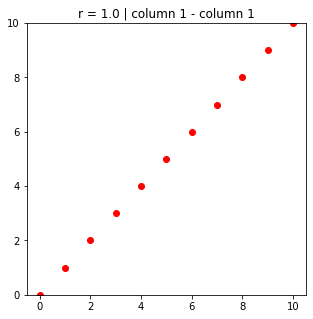

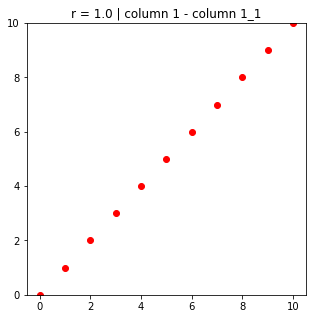

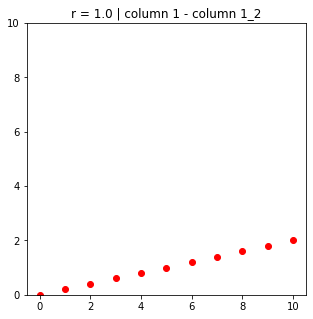

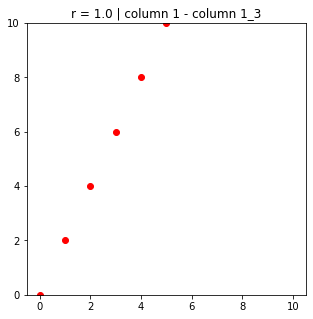

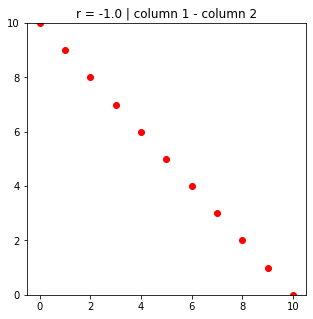

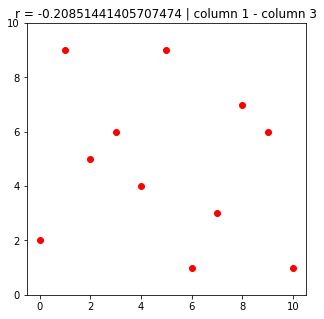

In [88]:
""" Calculating correlation coefficient - Pearson - with built-in Pandas module """
import pandas as pd
import matplotlib.pyplot as plt
import random


df = pd.DataFrame({
	'column 1': list(range(0,11)),
	'column 1_1': list(range(0,11)),
	'column 1_2': [0,0.2,0.4,0.6,0.8,1,1.2, 1.4, 1.6, 1.8, 2],
	'column 1_3': list(range(0, 22, 2)),
	'column 2': list(range(10,-1,-1)),
	'column 3': [ random.randint(1,10) for i in range(0,11)  ]
})
print(df)

columns = list(df.columns)
for i in columns:
	correlation_value = df['column 1'].corr(df[i])
	print(f"Correlation 'column 1'-'{i}': { correlation_value }")
	fig, ax = plt.subplots(figsize=(5,5))
	plt.plot( df['column 1'], df[i], 'or' )
	# df.plot(kind='scatter', x='column 1', y=i)
	plt.title(f'r = {correlation_value} | column 1 - {i}')
	plt.yticks([0,2,4,6,8,10])
	ax.set_ylim([0, 10])




In [71]:
corr_matrix_df = df.corr()
corr_matrix_df['column 1'].sort_values(ascending=False)

column 1      1.000000
column 1_1    1.000000
column 3      0.009649
column 2     -1.000000
Name: column 1, dtype: float64

black; Correlation value: -0.019. p-value: 0.849
blue; Correlation value: 1.000. p-value: 0.000
red; Correlation value: 0.069. p-value: 0.494


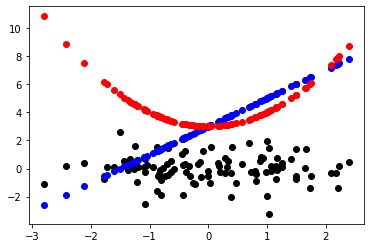

In [26]:
# Pearson correlation

import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

a = np.random.normal(0, 1, size=100)
b = np.random.normal(0, 1, size=100)
c = a*2 + 3
d = a**2 + 3

val, pval = scipy.stats.pearsonr(a, b)
print(f"black; Correlation value: {val:.3f}. p-value: {pval:.3f}")
plt.scatter(x=a, y=b, color='black')

val, pval = scipy.stats.pearsonr(a, c)
print(f"blue; Correlation value: {val:.3f}. p-value: {pval:.3f}")
plt.scatter(x=a, y=c, color='blue')

# As it is pearson, it doesn't see non-linear dependency
val, pval = scipy.stats.pearsonr(a, d)
print(f"red; Correlation value: {val:.3f}. p-value: {pval:.3f}")
plt.scatter(x=a, y=d, color='red')


Pearson
black; Correlation value: 1.000. p-value: 0.000
blue; Correlation value: 0.447. p-value: 0.001

Spearman
black; Correlation value: 1.000. p-value: 0.000
blue; Correlation value: 1.000. p-value: 0.000


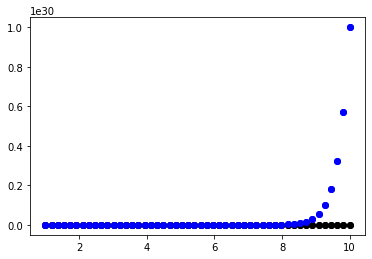

In [37]:
# Spearman correlation

np.random.seed(1)

a = np.linspace(1, 10)
b = a*3
c = a**30

print('Pearson')
val, pval = scipy.stats.pearsonr(a, b)
print(f"black; Correlation value: {val:.3f}. p-value: {pval:.3f}")
plt.scatter(x=a, y=b, color='black')

val, pval = scipy.stats.pearsonr(a, c)
print(f"blue; Correlation value: {val:.3f}. p-value: {pval:.3f}")
plt.scatter(x=a, y=c, color='blue')

print('\nSpearman')
val, pval = scipy.stats.spearmanr(a, b)
print(f"black; Correlation value: {val:.3f}. p-value: {pval:.3f}")
plt.scatter(x=a, y=b, color='black')

val, pval = scipy.stats.spearmanr(a, c)
print(f"blue; Correlation value: {val:.3f}. p-value: {pval:.3f}")
plt.scatter(x=a, y=c, color='blue')


In [39]:
# Kendall-tau correlation coefficient

a = np.linspace(1, 10)
b = a*3

val, pval = scipy.stats.kendalltau(a, b)
val, pval


(1.0, 6.575898833266317e-65)

Sample size: 10
Mean values: 15.6 | 79.7
Sums of squared diff from the mean: 42.4 | 1206.1
Standard deviations: 2.171 | 11.576
Sum of products of differences from the mean of x and y: 134.8
Correlation coefficient r: 0.596
--------------------------------------------------
Slope m = 3.179
Intercept a = 30.104
Regression equation: y = 30.104 + 3.179x


<AxesSubplot:>

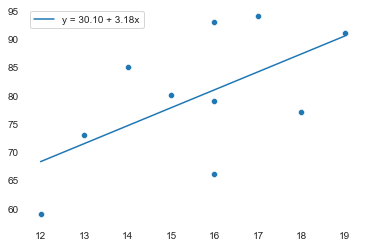

In [20]:
""" Calculating linear regression by hand """
import numpy as np, matplotlib.pyplot as plt, seaborn as sns

x_variable = [17, 13, 12, 15, 16, 14, 16, 16, 18, 19]
y_variable = [94, 73, 59, 80, 93, 85, 66, 79, 77, 91]

N = len(x_variable)
print(f"Sample size: {N}")

x_mean, y_mean = np.mean(x_variable), np.mean(y_variable)
print(f"Mean values: {x_mean} | {y_mean}")



sum_squaredDiff_x = sum([ (x - x_mean)**2 for x in x_variable ])
sum_squaredDiff_y = sum([ (y - y_mean)**2 for y in y_variable ])
print(f"Sums of squared diff from the mean: {sum_squaredDiff_x} | {sum_squaredDiff_y}")

x_SD = np.sqrt( sum_squaredDiff_x / (N-1) )
y_SD = np.sqrt( sum_squaredDiff_y / (N-1) )
print(f"Standard deviations: {x_SD:.3f} | {y_SD:.3f}")

sum_product_diffFromMean_x_y = sum([ (x-x_mean)*(y-y_mean) for x, y in zip(x_variable, y_variable) ])
print(f"Sum of products of differences from the mean of x and y: {sum_product_diffFromMean_x_y}")

# Calculate correlation coefficient r
r = sum_product_diffFromMean_x_y / np.sqrt( sum_squaredDiff_x * sum_squaredDiff_y )
print(f"Correlation coefficient r: {r:.3f}")
print('-'*50)

# Calculate slope
m = r * (y_SD / x_SD)
print(f"Slope m = {m:.3f}")
# Calculate intercept
a = y_mean - m*x_mean
print(f"Intercept a = {a:.3f}")
# Derive the regression equation
print(f"Regression equation: y = {a:.3f} + {m:.3f}x")

sns.scatterplot(x=x_variable, y=y_variable)
x1 = np.arange(12, 20, 1)
sns.lineplot( x=x1, y= a + m*x1, label=f'y = {a:.2f} + {m:.2f}x' )

3.179245283018868 30.10377358490566
RMSE: 8.82
Actual equation with RMSE: y = (30.10 + 3.18x) +/- 8.82 


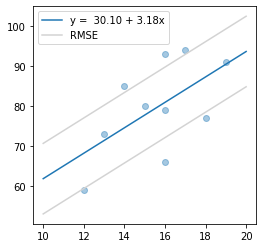

In [ ]:
""" Using scipy """
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x_variable = [17, 13, 12, 15, 16, 14, 16, 16, 18, 19]
y_variable = [94, 73, 59, 80, 93, 85, 66, 79, 77, 91]

slope, intercept, r_value, p_value, std_err = stats.linregress(x_variable,y_variable)
print(slope, intercept)

fig = plt.figure(figsize=(4, 4))
x = np.arange(10, 21, 1 )
plt.plot( x, x*slope + intercept, label=f'y =  {intercept:.2f} + {slope:.2f}x' )
plt.scatter( x_variable, y_variable, alpha=0.4 )
plt.legend()


y_predicted = [ x*slope + intercept for x in x_variable ]
sum_squared_diff = sum([ (y_hat - y)**2 for y, y_hat in zip(y_variable, y_predicted) ])
rmse = ( sum_squared_diff/len(y_variable) )**0.5
print(f"RMSE: {rmse:.2f}")
print(f"Actual equation with RMSE: y = ({intercept:.2f} + {slope:.2f}x) +/- {rmse:.2f} ")

plt.plot( x, x*slope + intercept + rmse, color='lightgrey', label='RMSE' )
plt.plot( x, x*slope + intercept - rmse, color='lightgrey' )
plt.legend()

Intercept: 21.185
Coefficient exposure: -0.213
16.929652100465578


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


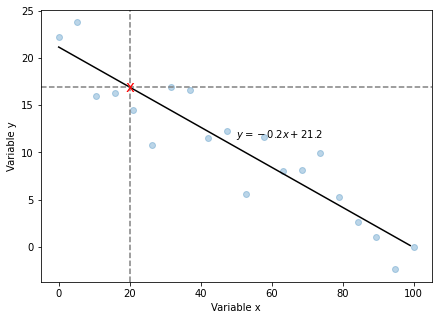

In [ ]:
""" Using Sklearn and the ML approach """
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import random
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt, seaborn as sns
import numpy as np

# Generate semi-random dataset
dataset = pd.DataFrame({
	'Variable_x': np.linspace(0, 100, 20), 
	'Variable_y': [i + random.uniform(-5, 5) for i in range(20, 0, -1)]
})
dataset['Variable_y']

# Data Scatterplot
plt.figure(figsize=(7,5))
plt.scatter(dataset['Variable_x'], dataset['Variable_y'], alpha=0.3 )
plt.xlabel('Variable x'); plt.ylabel('Variable y')

# Linear Regression
model = LinearRegression()
# model.fit(lung[['Exposure']], lung['PEFR'])
model.fit(dataset[['Variable_x']], dataset['Variable_y'])
linreg_intercept = model.intercept_
linreg_coef = model.coef_[0]
print(f"Intercept: {linreg_intercept:.3f}")
print(f"Coefficient exposure: {linreg_coef:.3f}")

x_regline = np.arange(0, 100, 1)
plt.plot(x_regline, linreg_coef*x_regline + linreg_intercept, color='black')
plt.text(50, model.predict([[50]])[0] +1, rf'$y = {linreg_coef:.1f}x + {linreg_intercept:.1f}$')

# Prediction of a specified value
x_value = 20
predicted_y = model.predict([[x_value]])[0]; print(predicted_y)
plt.text(x_value, predicted_y, 'x', size=15, color='red', ha='center', va='center')
plt.axhline(predicted_y, color='grey', linestyle='dashed')
plt.axvline(x_value, color='grey', linestyle='dashed')

Intercept: 1.147
Coefficient exposure: 0.745
R^2 score: 0.57


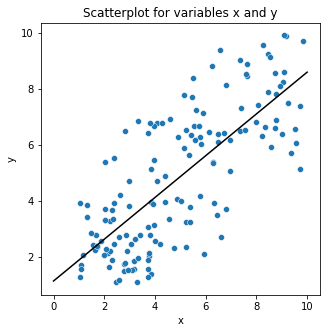

In [106]:
# Sklearn, but from two vectors

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 
N = 3*50
x = [random.uniform(1,4) for i in range(int(N/3))] + [random.uniform(2,7) for i in range(int(N/3))] + [random.uniform(5,10) for i in range(int(N/3))]
y = [random.uniform(1,4) for i in range(int(N/3))] + [random.uniform(2,7) for i in range(int(N/3))] + [random.uniform(5,10) for i in range(int(N/3))]

plt.figure(figsize=(5,5))
sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot for variables x and y')

model = LinearRegression()
# features, even if there's only one, should be in the format: [[value],[value],[value],...]
x_proc = [[i] for i in x]
model.fit(x_proc, y)
intercept, coef = model.intercept_, model.coef_[0]
print(f"Intercept: {intercept:.3f}")
print(f"Coefficient exposure: {coef:.3f}")
x_regline = np.arange(0,11,1)
sns.lineplot(x=x_regline, y=coef*x_regline + intercept, color='black');
y_true, y_pred = y, [ coef*i + intercept for i in x ]
r2_score = r2_score( y_true=y_true, y_pred=y_pred )
print(f"R^2 score: {r2_score:.2f}")


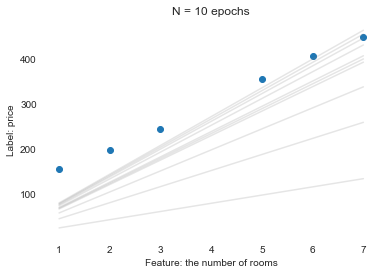

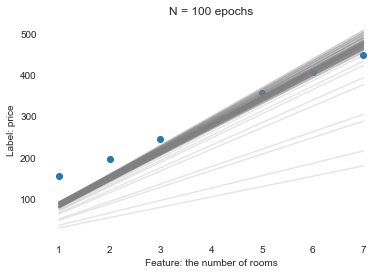

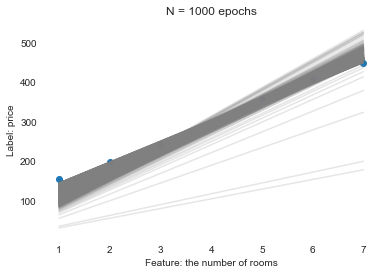

In [21]:
""" Obtaining an equation by teaching a model
(described in the "Grokking Machine Learning" book) """
import random
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
	"""
	"Grokking Machine Learning", p. 55
	"""
	predicted_price = base_price + price_per_room * num_rooms
	base_price += learning_rate * (price - predicted_price)
	price_per_room += learning_rate * num_rooms * (price - predicted_price)
	return price_per_room, base_price

def linear_regression(features, labels, learning_rate=0.01, epochs=1000):
	""" 
	learning_rate = a very small number by which changes to the model are made. 
	epochs = how many iterations of learning we need to perform. 
	"""
	# Generate random values for the slope and y-intercept
	price_per_room = random.random() 
	base_price = random.random()
	# Repeats the update step many times
	slope_intercept_list = []
	for epoch in range(epochs):
		# Pick a random point in out dataset
		i = random.randint(0, len(features)-1) 
		num_rooms = features[i]
		price = labels[i]
		# Apply the square trick to move the line closer to our point
		price_per_room, base_price = square_trick(base_price, price_per_room, num_rooms, price, learning_rate=learning_rate)
		slope_intercept_list.append([price_per_room, base_price])
	return slope_intercept_list

import numpy as np
features = np.array([1,2,3,5,6,7])
labels = np.array([155,197,244,356,407,448])

# Plot the visualisations
figure_size, epoch_alpha = (6,4), 0.2
for i in [10, 100, 1000]: # Different number of epochs
	plt.figure(figsize=figure_size)
	plt.scatter( features, labels )
	plt.xlabel('Feature: the number of rooms'); plt.ylabel('Label: price'); plt.title(f"N = {i} epochs")
	slope_intercept_list_ready = linear_regression(features, labels, learning_rate=0.01, epochs=i)
	for i in slope_intercept_list_ready:
		plt.plot( features, features*i[0] + i[1], color='grey', alpha=epoch_alpha )


In [ ]:
"""Using TensorFlow"""

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf


In [ ]:
# load dataset
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
print(dftrain.columns)
print(dftrain.shape)
dftrain.head()


Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')
(627, 10)


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
y_train, y_eval = dftrain.pop('survived'), dfeval.pop('survived')

<AxesSubplot:>

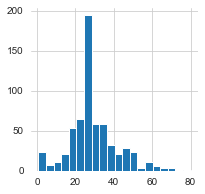

In [ ]:
dftrain['age'].hist(bins=20, figsize=(3,3))

<AxesSubplot:>

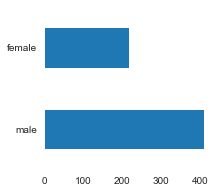

In [ ]:
dftrain['sex'].value_counts().plot(kind='barh', figsize=(3,3))

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
	vocabulary = dftrain[feature_name].unique()
	feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
	feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [ ]:
# Epoch - the number of times the model will see the dataset. 

def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs) # Split the dataset into batches of 32 and repeat process for number of epochs
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns);
linear_est.train(train_input_fn);
result = linear_est.evaluate(eval_input_fn);

# clear_output() # clear console output
print(result['accuracy'])
print(result)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\evgen\\AppData\\Local\\Temp\\tmp_rzcc01z', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_v

In [ ]:
result = list( linear_est.predict(eval_input_fn) );

i = 2
probability_survival = result[i]['probabilities'][1]
probability_death = result[i]['probabilities'][0]
print(dfeval.loc[i])
print(f"Actual survivability: {y_eval.loc[i]}")
print(f"Probability of survival: {probability_survival:.3f}")
print(f"Probability of death: {probability_death:.3f}")

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\evgen\AppData\Local\Temp\tmp_rzcc01z\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                        female
age                          58.0
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                            C
embark_town           Southampton
alone                           y
Name: 2, dtype: object
Actual survivability: 1
Probability of survival: 0.808
Probability of death: 0.192


## Multiple Linear

Equation taking into account multiple predictors. 

$$ Y = b_{0} + b_{1}X_{1} + b_{2}X_{2} + ... + b_{p}X_{p} + e $$

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:

diabetes = datasets.load_diabetes()
diabetes
print(diabetes.data[:3])
print(diabetes.target[:3])
print(diabetes.feature_names)

df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['Target'] = pd.Series(diabetes.target)
print(df_diabetes['Target'].min(), df_diabetes['Target'].max())
df_diabetes

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]]
[151.  75. 141.]
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
25.0 346.0


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [30]:
# Check correlation between predictors

columns = list(df_diabetes.columns)
print(columns)
print("Let's show highly-correlated variables:")
for i in range( len(columns)-2 ):
	for j in range( i+1, len(columns)-1 ):
		# print(columns[i], columns[j])
		correlation = df_diabetes[columns[i]].corr(df_diabetes[columns[j]])
		if correlation > 0.5:
			print(f"  {columns[i]} - {columns[j]}: {correlation}")


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'Target']
Let's show highly-correlated variables:
  s1 - s2: 0.8966629578104894
  s1 - s4: 0.5422072805232411
  s1 - s5: 0.5155029243689462
  s2 - s4: 0.659816888666644
  s4 - s5: 0.6178589739937288


In [35]:
diabetes_lm = LinearRegression()
predictors = ['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
outcome = 'Target'
diabetes_lm.fit(df_diabetes[predictors], df_diabetes[outcome])

print(f'Intercept: {diabetes_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, diabetes_lm.coef_):
	print(f' {name}: {coef}')

Intercept: 152.133
Coefficients:
 bmi: 557.8045372748204
 bp: 268.42101324125576
 s1: -707.369896708688
 s2: 411.84422838252107
 s3: 135.61557099951838
 s4: 126.87933681537558
 s5: 750.5044946417453
 s6: 43.781834248619134


In [36]:
fitted = diabetes_lm.predict(df_diabetes[predictors])
RMSE = np.sqrt(mean_squared_error(df_diabetes[outcome], fitted))
r2 = r2_score(df_diabetes[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 54
r2: 0.5002


## Polynomial

Polynomial curve can be fitted to nonlinear data. Before fitting, decide on a shape: degree 1 - line; degree 2 - a parabola; degree 3 - a cubic. 




## Logistic

Sigmoid (logit) function. 

$$ logit(y) = \frac{ 1 }{ 1 + e^{-y} } $$

<img src="Media/Logistic_regression.png" width=200>

## Residuals plot



Intercept: 1.339
Coefficient exposure: 0.739
R^2 score: 0.53
Intercept: 0.207
Coefficient exposure: 0.950
R^2 score: 0.92


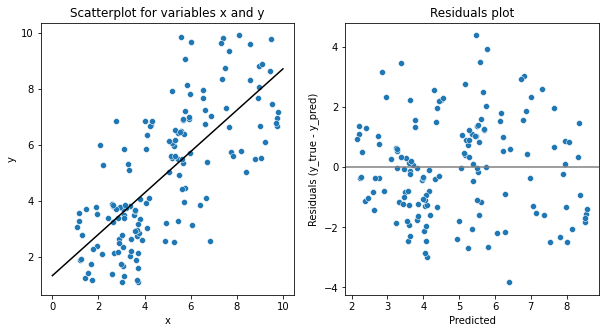

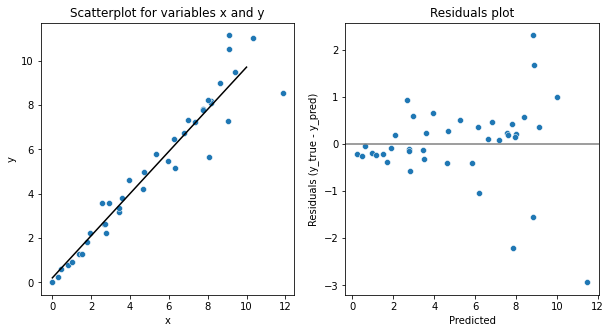

In [126]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def plot_plot_and_residuals(x, y):
	plt.figure(figsize=(10,5))
	plt.subplot(1,2,1)
	sns.scatterplot(x=x, y=y)
	plt.xlabel('x')
	plt.ylabel('y')
	plt.title('Scatterplot for variables x and y')

	model = LinearRegression()
	# features, even if there's only one, should be in the format: [[value],[value],[value],...]
	x_proc = [[i] for i in x]
	model.fit(x_proc, y)
	intercept, coef = model.intercept_, model.coef_[0]
	print(f"Intercept: {intercept:.3f}")
	print(f"Coefficient exposure: {coef:.3f}")
	x_regline = np.arange(0,11,1)
	sns.lineplot(x=x_regline, y=coef*x_regline + intercept, color='black');
	y_true, y_pred = y, [ coef*i + intercept for i in x ]
	r2 = r2_score( y_true=y_true, y_pred=y_pred )
	print(f"R^2 score: {r2:.2f}")

	# Residuals plot
	residuals = [i-j for i,j in zip(y_true, y_pred)]
	# plt.figure(figsize=(5,5))
	plt.subplot(1,2,2)
	sns.scatterplot( x=y_pred, y=residuals )
	plt.xlabel('Predicted'); plt.ylabel('Residuals (y_true - y_pred)')
	plt.axhline(0, color='grey')
	plt.title('Residuals plot')

# High variability
N = 3*50
x = [random.uniform(1,4) for i in range(int(N/3))] + [random.uniform(2,7) for i in range(int(N/3))] + [random.uniform(5,10) for i in range(int(N/3))]
y = [random.uniform(1,4) for i in range(int(N/3))] + [random.uniform(2,7) for i in range(int(N/3))] + [random.uniform(5,10) for i in range(int(N/3))]
plot_plot_and_residuals(x,y)

# Low variability
x = np.linspace(0,10,40)
y = x
x = [i*random.uniform(0.8,1.2) for i in x]
y = [i*random.uniform(0.8,1.2) for i in y]
plot_plot_and_residuals(x,y)

# Supervised ML: Classification

## Discrete perceptron

Returns boolean. 

To calculate the output, the discrete perceptron uses the step function. 

Linear classification algorithm that separates two classes by a line / hyperplane. The simplest type of NN. Classifier with N features is represented as an (n-1)-dimensional hyperplane. 

$$ \hat{y} = step( b + \sum_{i=1}^{n} w_{i} x_{i} ) $$

---

Procedure for the perceptron: 

As input in each epoch, we have:
- Perceptron with weights $a$, $b$, and bias $c$;
- A point with coordinates $(x_{1}, x_{2})$ and label $y$;
- Learning rate $\eta$

Output:
- Perceptron with new values for weights $a'$, $b'$ and bias $c'$

Procedure:
- Make a prediction: $ \hat{y} = step(ax_{1} + bx_{2} + c) $
- Return new perceptron:

$$ a' = a + \eta(y-\hat{y}) x_{1} $$
$$ b' = b + \eta(y-\hat{y}) x_{2} $$
$$ c' = c + \eta(y-\hat{y}) $$

### 1 (by hand)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [35]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

df = pd.DataFrame({
	'feature 1': features[:,0], 
	'feature 2': features[:,1],
	'label': labels
})

df.head()

,feature 1,feature 2,label
0,1,0,0
1,0,2,0
2,1,1,0
3,1,2,0
4,1,3,1


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


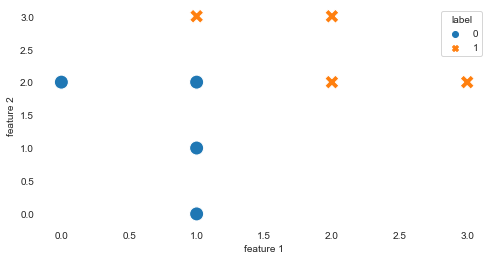

In [36]:
plt.figure(figsize=(8,4));
sns.scatterplot( 
	df['feature 1'], df['feature 2'], 
	style=df['label'], 
	s=200, 
	hue=df['label']
	# markers={'feature 1':'s', 'feature 2': 'X'}
);

In [37]:
# Coding the perceptron trick

def score(weights, bias, features):
	return np.dot(features, weights) + bias 

def step(x):
	if x >= 0:
		return 1
	else:
		return 0

def prediction(weights, bias, features):
	return step(score(weights, bias, features))

def error(weights, bias, features, label):
	pred = prediction(weights, bias, features)
	if pred == label:
		return 0
	else:
		return np.abs( score(weights, bias, features) )

def mean_perceptron_error(weights, bias, features, labels):
	total_error = 0
	for i in range(len(features)):
		total_error += error(weights, bias, features[i], labels[i])
	return total_error / len(features)

def perceptron_trick(weights, bias, features, label, learning_rate=0.01):
	pred = prediction(weights, bias, features)
	for i in range(len(weights)):
		weights[i] += (label-pred) * features[i] * learning_rate
	bias += (label-pred) * learning_rate
	return weights, bias

def perceptron_algorithm(features, labels, learning_rate=0.01, epochs=200):
	weights = [1.0 for i in range(len(features[0]))]
	bias = 0.0
	errors = []
	cumulative_weights_bias = []
	for epoch in range(epochs):
		error = mean_perceptron_error(weights, bias, features, labels)
		errors.append(error)
		i = random.randint(0, len(features)-1)
		weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
		cumulative_weights_bias.append([ weights, bias ])
		# Draw a graph
		datapoints = np.arange(0, 4, 1)
		a = weights[0]
		b = weights[1]
		c = bias
		sns.lineplot( x=datapoints, y=(-a*datapoints - c)/b , alpha=0.05, color='grey'  )
	return weights, bias, cumulative_weights_bias, errors



0.46999999999999953
0.07999999999999936
-0.6400000000000003


<AxesSubplot:xlabel='feature 1', ylabel='feature 2'>

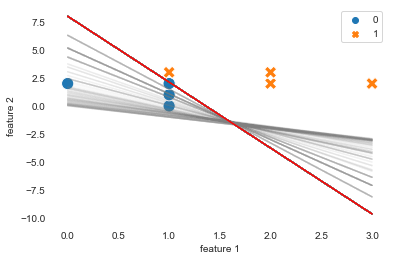

In [45]:
# Plot
sns.scatterplot( 
	x=df['feature 1'], y=df['feature 2'], 
	style=df['label'], 
	s=150, 
	hue=df['label'], 
	# markers={'feature 1':'s', 'feature 2': 'X'}
)

output = perceptron_algorithm(features, labels, epochs=300)
a = output[0][0]; print(a) # "a" is the weight for x-axis feature
b = output[0][1]; print(b) # "b" is the weight for y-axis feature
c = output[1]; print(c)

datapoints = np.arange(0, 4, 1)
sns.lineplot( x=datapoints, y=(-a*datapoints - c)/b , color='red'  )

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

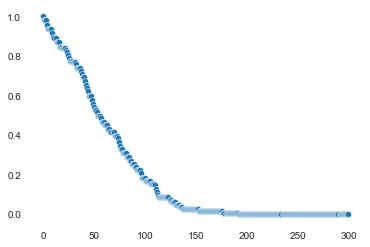

In [46]:
# Errors

errors = output[-1]
# print(errors)

sns.scatterplot( np.arange(0, len(errors), 1), errors )


### 2 

In [ ]:
import numpy as np, pandas as pd
from sklearn import metrics
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt, seaborn as sns

<AxesSubplot:xlabel='feature 1', ylabel='feature 2'>

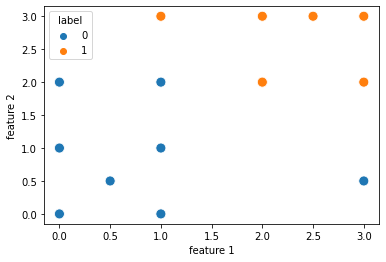

In [ ]:
# Let's stay that we start with vectorised data
# First, let's convert it to a Pandas dataframe

features = np.array([[3,0.5],[0.5,0.5],[0,0],[0,1],[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2],[3,3],[2,2],[2.5,3]])
labels = np.array([0,0,0,0,0,0,0,0,1,1,1,1,1,1,1])

df = pd.DataFrame({
	'feature 1': features[:,0], 
	'feature 2': features[:,1],
	'label': labels
})

sns.scatterplot( data=df, x='feature 1', y='feature 2', hue='label', s=100 )

In [ ]:
# Next, let's vectorise the data from Pandas dataframe back into a vector

X = df[['feature 1', 'feature 2']].values
print(X)
y = df['label'].values
print(y)

[[3.  0.5]
 [0.5 0.5]
 [0.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  2. ]
 [1.  1. ]
 [1.  2. ]
 [1.  3. ]
 [2.  2. ]
 [2.  3. ]
 [3.  2. ]
 [3.  3. ]
 [2.  2. ]
 [2.5 3. ]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 20% of data is for testing 
print(X_train)
print(y_train)

# Train the model
model = Perceptron()
model.fit( X_train, y_train )

# Make predictions on the test portion of the data and calculate the accuracy
predictions = model.predict( X_test )
accuracy = metrics.accuracy_score( y_test, predictions )
print(predictions)
print(f"Accuracy: {accuracy}")

# Make a prediction of a certain value
a = [[1,1]]
print("predicted value: ", model.predict(a))



[[0.  1. ]
 [1.  1. ]
 [2.  3. ]
 [0.5 0.5]
 [3.  0.5]
 [1.  2. ]
 [3.  2. ]
 [2.  2. ]
 [2.  2. ]
 [0.  2. ]
 [1.  0. ]
 [1.  3. ]]
[0 0 1 0 0 0 1 1 1 0 0 1]
[0 1 1]
Accuracy: 1.0
predicted value:  [0]


[[2.5 2.5]]
2.5 2.5 -9.0


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feature 1', ylabel='feature 2'>

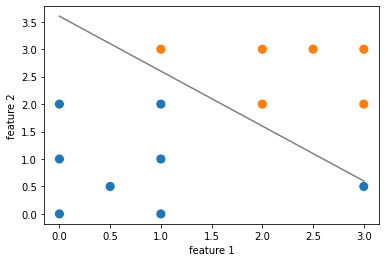

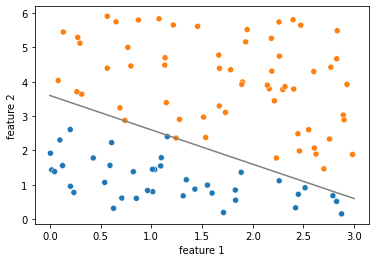

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot( data=df, x='feature 1', y='feature 2', hue='label', s=100, legend=False )

coefficients = model.coef_
print(coefficients)
coeff1 = coefficients[0][0]
coeff2 = coefficients[0][1]
intercept = model.intercept_[0]
print(coeff1, coeff2, intercept)
x = np.arange(0, 3.1, 1)
sns.lineplot( x, (-coeff1*x - intercept)/coeff2, color='grey' )

plt.figure(figsize=(6,4))
sns.lineplot( x, (-coeff1*x - intercept)/coeff2, color='grey' )

# Now let's visualise our data on some predicted values

features_predict = np.array( [ [random.uniform(0,3), random.uniform(0,6)] for i in range(100) ] )
labels_predict = np.array( model.predict(features_predict) )

df_predict = pd.DataFrame({
	'feature 1': features_predict[:, 0], 
	'feature 2': features_predict[:, 1], 
	'predicted labels': labels_predict
})
df_predict.head()

sns.scatterplot( data=df_predict, x='feature 1', y='feature 2', hue='predicted labels', legend=False )

# The final equation is x1*a + x2*b + c = 0, where a and b = model.coef_[0] and model.coef_[1]; c = intercept = model.intercept_[0]
# Also, equation can be written as: x2 = (-x1*a - c)/b


## Logistic regression (continuous perceptron)


Logistic regression - continuous perceptron uses the sigmoid function to calculate the output. 

Prediction:

$$ \hat{y} = \sigma( \sum_{i=1}^{n} w_{i} x_{i} + b ) $$




Returns a float within the $[0,1]$ range. 
- Close to $0$ - more like "No", 
- close to $0.5$ - neutral, 
- close to $1$ - more like "Yes".

Uses sigmoid function. 



### 1 (by hand)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import random

<AxesSubplot:xlabel='feature 1', ylabel='feature 2'>

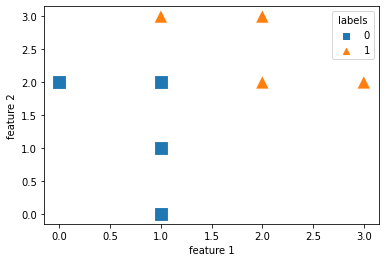

In [ ]:


features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

# Visualise the dots
df = pd.DataFrame({
	'feature 1': features[:,0],
	'feature 2': features[:,1],
	'labels': labels
})
df

sns.scatterplot( data=df, x='feature 1', y='feature 2', style='labels', s=200, hue='labels', markers={0:"s", 1:"^"} )


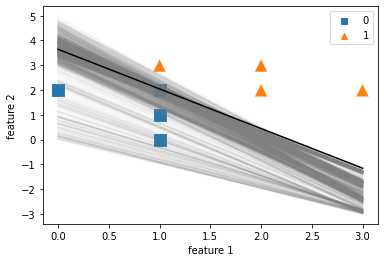

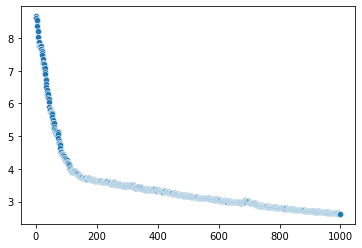

In [ ]:
import utils, random

def sigmoid(x):
	""" the Sigmoid function """
	return np.exp(x) / (1 + np.exp(x))

def score(weights, bias, features):
	""" dot product is like product between vectors (x1,x2,...,xn) and (w1,w2,...,wn) = w1x1 + w2x2 + ... + wnxn """
	return np.dot(weights, features) + bias

def prediction(weights, bias, features):
	return sigmoid(score(weights, bias, features))

def log_loss(weights, bias, features, label):
	pred = prediction(weights, bias, features)
	return -label*np.log(pred) - (1-label)*np.log(1-pred)

def total_log_loss(weights, bias, features, labels):
	total_error = 0
	for i in range(len(features)):
		total_error += log_loss(weights, bias, features[i], labels[i])
	return total_error

def logistic_trick(weights, bias, features, label, learning_rate=0.01):
	pred = prediction(weights, bias, features)
	for i in range(len(weights)):
		weights[i] += (label-pred)*features[i]*learning_rate
		bias += (label-pred)*learning_rate
	return weights, bias

def logistic_regression_algorithm(features, labels, learning_rate=0.01, epochs=1000):
	sns.scatterplot( data=df, x='feature 1', y='feature 2', style='labels', s=200, hue='labels', markers={0:"s", 1:"^"} )
	weights = [1.0 for i in range(len(features[0]))]
	bias = 0.0
	errors = []
	for i in range(epochs):
		errors.append(total_log_loss(weights, bias, features, labels))
		j = random.randint(0, len(features)-1)
		weights, bias = logistic_trick(weights, bias, features[j], labels[j])
		# Plot
		x = np.arange(0, 4, 1)
		sns.lineplot( x=x, y=(-weights[0] * x - bias)/weights[1], color='grey', alpha=0.05 )
	sns.lineplot( x=x, y=(-weights[0] * x - bias)/weights[1], color='black' )
	plt.figure(figsize=(6,4))
	# print(errors)
	sns.scatterplot( x=[i for i in range(epochs)], y=errors )
	return weights, bias

weights, bias = logistic_regression_algorithm(features, labels, epochs=1000)



In [ ]:
print(weights, bias)
print('-'*30)

def predict(weights, bias, X):
	x = np.dot( X, weights ) + bias
	y_hat = np.exp(x) / (1 + np.exp(x))
	print(y_hat)

predict(weights, bias, [[1,0], [1,3], [3,2]])

[1.0586282687437438, 0.6624514258859706] -2.4123297834458417
------------------------------
[0.20526588 0.65331725 0.88977627]


### 2 (IMBD)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('example_datasets/ML/IMDB_Dataset.csv')

def text_clean(text):
	text = text.lower()
	text = re.sub( '[,.?:\'"]', '', text )
	text = re.sub( '<br />', '', text )
	return text

df['proc'] = df['review'].apply( lambda x: text_clean(x) )

df.head()

,review,sentiment,proc
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy (...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


In [ ]:
Independent_var = df['proc']
Dependent_var = df['sentiment']

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size=0.1, random_state=225)

print( f"IV_train: {len(IV_train)} | DV_train: {len(DV_train)}" )
print( f"IV_test: {len(IV_test)} | DV_test: {len(DV_test)}" )

IV_train: 45000 | DV_train: 45000
IV_test: 5000 | DV_test: 5000


In [ ]:
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = 'lbfgs')

In [ ]:
model = Pipeline([('vectorizer', tvec),('classifier',clf2)])
model.fit(IV_train, DV_train)

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2241,  233],
       [ 265, 2261]], dtype=int64)

In [ ]:

print(f"Accuracy: {accuracy_score(predictions, DV_test)}")
print(f"Precision: {precision_score(predictions, DV_test, average='weighted')}")
print(f"Recall: {recall_score(predictions, DV_test, average='weighted')}")


Accuracy: 0.9004
Precision: 0.9004788607422379
Recall: 0.9004


In [ ]:
example = ['It was bad. I expected this movie to be much more exciting, but in the end it was disappointing.']
result = model.predict(example)
print(result)

['negative']


### 3 (cancer)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split


In [ ]:
brca = load_breast_cancer()
print(brca.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
X = pd.DataFrame(columns=brca.feature_names, data=brca.data)
y = brca.target

X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Features that we want to predict 
print(brca.target_names)
print(y)

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

clf = LogisticRegression(random_state=1)

clf.fit(X_train, y_train)
clf.predict(X_test)

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0])

## naive Bayes

This algorithms estimates the probability of observing an outcome of interest $Y = i$, given a set of features / predictors.

Exact / complete Bayesian classification: finding all the records that are exactly like the new record to be classified, with the exact values for all predictors / features, and for those records calculating which class is the most probable. The problem with this lies in a very small likelihood of the exact matches existing in the dataset, i.e. the data with the exactly equal feature values. 

Suppose that we have a dataset with features (predictors) $X$ having values $X_{1}, X_{2}, ..., X_{p}$, and a label ($Y=i$). Formula for the exact Bayes probability to calculate probability for a class given a set of features:

$$ P(Y=i|X_{1},X_{2},...,X_{p}) = \frac{P(Y=i)P(X_{1},X_{2},...,X_{p}|Y=i)}{ P(Y=0)P(X_{1},X_{2},...,X_{p}|Y=0) + P(Y=1)P(X_{1},X_{2},...,X_{p}|Y=1) } $$


**The Naive Bayes solution**: we make a simplifying assumption that the *exact conditional probability is well approximated by the product of individual conditional probabilities*, iow that the probability of each feature is independent of the others: $P(X_{1},X_{2},...,X_{p}|Y=i) \approx P(X_{1}|Y=i)...P(X_{p}|Y=i)$

$$ P(Y=i|X_{1},X_{2},...,X_{p}) = \frac{ P(Y=i)P(X_{1}|Y=i)...P(X_{p}|Y=i) }{ P(Y=0)P(X_{1}|Y=0)...P(X_{p}|Y=0) + P(Y=1)P(X_{1}|Y=1)...P(X_{p}|Y=1) } $$

The standard naive Bayes algorithm uses *categorical* features. To use numerical features, they can be processed by e.g. binning;


### Scikit-learn (more labels)

In [45]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB

df = pd.DataFrame({
	'Colour': ['red' for i in range(10)]+['orange', 'green', 'green'] +    ['green' for i in range(5)]+['yellow' for i in range(8)] +   ['yellow' for i in range(11)]+['green' for i in range(2)],
	'Shape': ['round' for i in range(13)] +                                ['oval' for i in range(13)] +                                ['crescent' for i in range(13)],
	'Fruit': ['apple' for i in range(13)] +                                ['pear' for i in range(13)] +                                ['banana' for i in range(13)]
})

df.head()

X = pd.get_dummies(df[['Colour', 'Shape']], prefix='', prefix_sep='')
print(X.head(1))
y = df[['Fruit']]
naive_model = MultinomialNB(alpha=0.01, fit_prior=True)
naive_model.fit(X, y)

# Predict
def add_to_empty_dataframe(df, data):
	""" This function is to ensure that the data that you want to predict
	is inputted in the same format as the data used for training """
	columns = list( df.columns )
	columns = { i:0 for i in columns }
	for i in data:
		columns[i] = 1
	df = df.append(columns, ignore_index=True);
	# print(df)
	return df


df_predict = pd.DataFrame([], columns=X.columns)
for i in [
	['green','round'],['green','round'], # Apple
	['yellow','oval'],['green','oval'], # Pear
	['yellow', 'crescent'],['green','crescent'] # Banana
	]:
	df_predict = add_to_empty_dataframe(df_predict, i)

df_predict

print( naive_model.predict(df_predict) )
print( f"Probabilties for {naive_model.classes_}:" )
print( naive_model.predict_proba(df_predict) )


   green  orange  red  yellow  crescent  oval  round
0      0       0    1       0         0     0      1
['apple' 'apple' 'pear' 'pear' 'banana' 'banana']
Probabilties for ['apple' 'banana' 'pear']:
[[9.97322685e-01 7.66581618e-04 1.91073329e-03]
 [9.97322685e-01 7.66581618e-04 1.91073329e-03]
 [9.58586200e-07 1.05540341e-03 9.98943638e-01]
 [3.08186255e-04 3.08186255e-04 9.99383627e-01]
 [6.97737864e-07 9.99440414e-01 5.58888029e-04]
 [7.66581618e-04 9.97322685e-01 1.91073329e-03]]


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\evgen\AppData\Local\Temp\ipykernel_14980\1729730501.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(columns, ignore_index=True);
C:\Users\evgen\AppData\Local\Temp\ipykernel_14980\1729730501.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(columns, ignore_index=True);
C:\Users\evgen\AppData\Local\Temp\ipykernel_14980\1729730501.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df

### 1 (by hand)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
emails = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_8_Naive_Bayes/emails.csv')
emails.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
def process_email(text):
	text = text.lower()
	return list(set(text.split()))

emails['words'] = emails['text'].apply(process_email)
emails.head()

,text,spam,words
0,Subject: naturally irresistible your corporate...,1,"[information, is, nowadays, distinctive, draft..."
1,Subject: the stock trading gunslinger fanny i...,1,"[muzo, is, plain, chameleon, boar, yes, ramble..."
2,Subject: unbelievable new homes made easy im ...,1,"[is, hearing, way, homes, the, ask, advantage,..."
3,Subject: 4 color printing special request add...,1,"[information, version, is, 8090, &, 5110, :, a..."
4,"Subject: do not have money , get software cds ...",1,"[is, me, are, t, compatibility, old, the, ende..."


In [ ]:
# Finding the priors
prior = sum(emails['spam']) / len(emails)
print(f"Priors: probability that an email is spam: {prior:.4f}")

# Finding the posterios with Bayes' theorem

## Create a dictionary called 'model', which records each word together with the number of appearances of the word in spam emails and in ham emails
model = {}
for index, email in emails.iterrows():
	for word in email['words']:
		if word not in model:
			model[word] = {'spam':1, 'ham':1} # Here we initialise the counts at 1, in order to prevent division by zero in the future
		if word in model:
			if email['spam']:
				model[word]['spam'] += 1
			else:
				model[word]['ham'] += 1

print(model['lottery'])
print(model['sale'])


Priors: probability that an email is spam: 0.2388
{'spam': 9, 'ham': 1}
{'spam': 39, 'ham': 42}


In [ ]:
# Implementing the naive Bayes algorithm
def predict_naive_bayes(email):
	total = len(emails) # Calculates the total number of emails, spam emails, and ham emails
	num_spam = sum(emails['spam'])
	num_ham = total - num_spam
	email = email.lower() # Proccess each email by turning it into a list of its words in lowercase
	words = set(email.split())
	spams = [1]
	hams = [1]
	for word in words:
		if word in model:
			# For each word, computes the conditional probability that an email containing that word is spam (or ham) as a ratio
			spams.append(model[word]['spam']/num_spam*total)
			hams.append(model[word]['ham']/num_ham*total)
	# Multiplies all the previous probabilities times the prior probability of the email being spam, and calls this prod_spams. 
	# Does a similar process for prod_hams
	prod_spams = np.compat.long(np.prod(spams)*num_spam)
	prod_hams =  np.compat.long(np.prod(hams)*num_ham)
	# Normalises these two probabilities to get them to add to one (using Bayes' theorem) and return the result
	return prod_spams/(prod_spams+prod_hams)



In [ ]:
print( predict_naive_bayes('Hi mom how are you?') );
print( predict_naive_bayes('meet me at the lobby of the hotel at nine am') )
print( predict_naive_bayes("buy cheap lottery easy money now") )
print( predict_naive_bayes('We have a business meeting at 9am in the meeting room') )


0.13743544730963977
6.964603508395965e-05
0.999973472265966
0.0006807487677137641


## SVM

(support vector machine)

<img src="Media/SVM.png" width=400>

SVM classifier uses two parallel lines instead of one line. SVM - line in the middle that tries to stay as far as possible from the points. 

Error function:

we try to maximie two things: the classification of the points and the distance between the lines. 

$$Error = C*classificationError + distanceError$$
, where $C$ - the C parameter. 

Classification error - sum of absolute values of the two equations. With increasing w1 and w2, the error becomes smaller. 

$$ distanceError = \frac{2}{\sqrt{w_{1}^{2} + w_{2}^{2}}} $$

C parameter:
- C is large, the error formula dominated by classification error, focusing more on this error; 
- C is small, focus on distance error. 

SVM is useful for linear classifiers and (with the use of kernel method) nonlinear classifiers. 

In [ ]:
# Effective when working with many features
# many kernel functions

# kernels (line) can be linear (straight line), polynomial (curves), exponential, RBF


In [ ]:
from sklearn import datasets
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
# Let's use the iris dataset
# and classify on whether the plant is vericosa, or other

iris = datasets.load_iris()
print(iris.DESCR)

In [ ]:

# split the data into features and labels
X, y = iris.data, iris.target
print(X.shape, y.shape)

classes = ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica']

from sklearn import svm
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# create a model object
model = svm.SVC()
model.fit(X_train, y_train)
print(model)

from sklearn.metrics import accuracy_score
# metrics
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print("Predictions: ", predictions)
print("Actual:      ", y_test)
print(f"Accuracy: {acc:.3f}")

for i in range(len(predictions)):
	print(classes[predictions[i]])

##### Proj 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import utils

In [ ]:
linear_data = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_11_Support_Vector_Machines/linear.csv', index_col=0)
linear_data.head()

In [ ]:
features = np.array(linear_data[['x_1', 'x_2']])
labels = np.array(linear_data['y'])
sns.scatterplot( data=linear_data, x='x_1', y='x_2', hue='y' )

In [ ]:
# Default C
svm_linear = SVC(kernel='linear')
svm_linear.fit(features, labels)
print(f"Default C | Accuracy: {svm_linear.score(features,labels):.3f}")

# C = 0.01
svm_c_001 = SVC(kernel='linear', C=0.01)
svm_c_001.fit(features, labels)
print("C = 0.01 | Accuracy:", svm_c_001.score(features, labels))


# C = 100
svm_c_100 = SVC(kernel='linear', C=100)
svm_c_100.fit(features, labels)
print("C = 100 | Accuracy:", svm_c_100.score(features, labels))


In [ ]:
# Now, training SVM with nonlinear boundaries - the kernel method

# A powerful method associated with SVM called the kernel method


In [ ]:
circular_data = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_11_Support_Vector_Machines/one_circle.csv', index_col=0)
features = np.array(circular_data[['x_1', 'x_2']])
labels = np.array(circular_data['y'])
circular_data.head()

In [ ]:
sns.scatterplot( data=circular_data, x='x_1', y='x_2', hue='y', s=80 )
# Circular dataset

In [ ]:
# Degree = 2
# We use degree of 2, because the equation of a circle is a polynomial of degree 2
# or, rather we use an oval shape
svm_degree_2 = SVC(kernel='poly', degree=2)
svm_degree_2.fit(features, labels)
print("Polynomial kernel of degree = 2")
print("Accuracy:", svm_degree_2.score(features, labels))
# utils.plot_model(features, labels, svm_degree_2)
print('-'*100)

# Degree = 4
# Like an oval with rounded edges
svm_degree_4 = SVC(kernel='poly', degree=4)
svm_degree_4.fit(features, labels)
print("Polynomial kernel of degree = 4")
print("Accuracy:", svm_degree_4.score(features, labels))
# utils.plot_model(features, labels, svm_degree_4)

In [ ]:
# What if there are two circles in the dataset?

In [ ]:
two_circles_data = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_11_Support_Vector_Machines/two_circles.csv', index_col=0)
features = np.array(two_circles_data[['x_1', 'x_2']])
labels = np.array(two_circles_data['y'])
two_circles_data.head()

In [ ]:
# gamma = 0.1
# Underfits a litte, because it thinks the boundary is one oval
svm_gamma_01 = SVC(kernel='rbf', gamma=0.1)
svm_gamma_01.fit(features, labels)
print("Gamma = 0.1")
print("Accuracy:", svm_gamma_01.score(features, labels))
utils.plot_model(features, labels, svm_gamma_01)

# gamma = 1
# Good model that captures the data well
# Best gamma
svm_gamma_1 = SVC(kernel='rbf', gamma=1)
svm_gamma_1.fit(features, labels)
print("Gamma = 1")
print("Accuracy:", svm_gamma_1.score(features, labels))
utils.plot_model(features, labels, svm_gamma_1)

# gamma = 10
# Overfit, as it encircles the outliers
svm_gamma_10 = SVC(kernel='rbf', gamma=10)
svm_gamma_10.fit(features, labels)
print("Gamma = 10")
print("Accuracy:", svm_gamma_10.score(features, labels))
utils.plot_model(features, labels, svm_gamma_10)

# gamma = 100
# Serious overfitting, where it surrounds each triangle with a small circular region
svm_gamma_100 = SVC(kernel='rbf', gamma=100)
svm_gamma_100.fit(features, labels)
print("Gamma = 100")
print("Accuracy:", svm_gamma_100.score(features, labels))
utils.plot_model(features, labels, svm_gamma_100)



## KNN

K-Nearest Neighbors (KNN).

Algorithm:
- Find K records with the similar features' values;
- To classify a new record, find the most prevalent class in those similar features;

The closeness (similarity, nearness) of the two records (vectors) with features $(x_{1},x_{2},...,x_{n})$ and $(u_{1},u_{2},...,u_{n})$ can be measured in different ways:
| Metric | Description | Formula |
| - | - | - |
| Euclidean distance | Straight-line (crow's fly) distance between two points | $$ \sqrt{(x_{1}-u_{1})^{2} + (x_{2}-u_{2})^{2} +...+(x_{n}-u_{n})^{2}} $$ |
| Manhattan distance | Distance between two points if calculated going through each dimension (feature) at a time. | $$ \|x_{1}-u_{1}\| + \|x_{2}-u_{2}\| + ... + \|x_{p}-u_{p}\| $$ |

The strategy of choosing K is very important. Normally, any $K>1$ is a good idea.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
	'Income'
})


## Decision trees

Decision tree: a ML model based on binary tree (yes-no answer). 

The algorithm to build a decision tree:
1. Figure out which data is the most useful to decide which app to recommend; 
2. This features splits the data into two smaller datasets; 
3. Repeat processes 1 and 2 for each of the two smaller datasets; 
4. Check homogeneity;

As we create rules for splitting the data, we need a way to measure **homogeneity**, or class purity inside of each partition.The following measures are useful:
| Measure | Description | Formula | Example |
| - | - | - | - |
| Accuracy | Split differently by the two features and check accuracy by recommending the most common in each group. **NOT a good measure for impurity**. | | |
| Gini impurity index | The measure of diversity. Can be interpreted as the probability that if we pick two random elements out of the set, they belong to different classes. | In a set with $m$ elements and $n$ classes, with $a_{i}$ elements belonging to the $i$-th class, the Gini impurity index is: $$ Gini = 1 - p_{1}^{2} - p_{2}^{2} - ... - p_{n}^{2} $$, where $p_{i} = \frac{a_{i}}{m}$. | E.g. Gini of the following set `[red, red, red, red, red, red, red, red, blue, blue]` is the following: $$ Gini = 1 - (\frac{8}{10})^{2} - (\frac{2}{10})^{2} = 0.32 $$ |
| Entropy of information | What is the probability that, by picking an item from the set, recording its value, and returning it to the pile, we get the exact sequence that defines the original set? | In a set with $m$ elements and $n$ classes, with $a_{i}$ elements belonging to the $i$-th class, the entropy is: $$ Entropy = -p_{1} log_{2}(p_{1}) - p_{2} log_{2}(p_{2}) - ... - p_{n} log_{2}(p_{n}) $$, where $ p_{i} = \frac{a_{i}}{m} $ | E.g. set `[red, red, red, red, red, red, red, red, blue, blue]`, $$ P(8r, 2b) = (\frac{8}{10})^{2} (\frac{2}{10})^{2} = 0.006711 $$ |



The above approaches each, can be summed up by average (if groups are of equal sizes) or weighted means (if unequally-sized groups). 



In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_9_Decision_Trees/Admission_Predict.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data['Admitted'] = data['Chance of Admit'] >= 0.75
data = data.drop(['Chance of Admit'], axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,True
2,324,107,4,4.0,4.5,8.87,1,True
3,316,104,3,3.0,3.5,8.00,1,False
4,322,110,3,3.5,2.5,8.67,1,True
5,314,103,2,2.0,3.0,8.21,0,False


In [ ]:
features = data.drop(['Admitted'], axis=1)
labels = data['Admitted']

# Training a decision tree
dt = DecisionTreeClassifier()
dt.fit(features, labels)
print( dt.predict(features[0:5]) )
print( dt.score(features, labels) ) # Score is 100%, so this model probably overfits
# If we plot this tree, the depth will be 10


[ True  True False  True False]
1.0


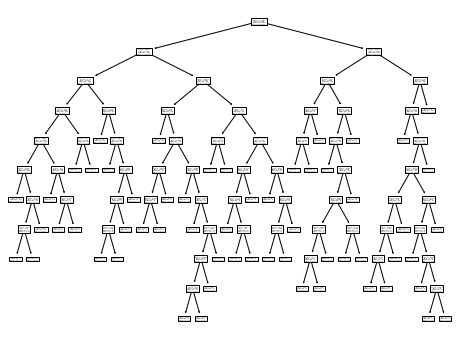

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(8,6));
plot_tree(dt);

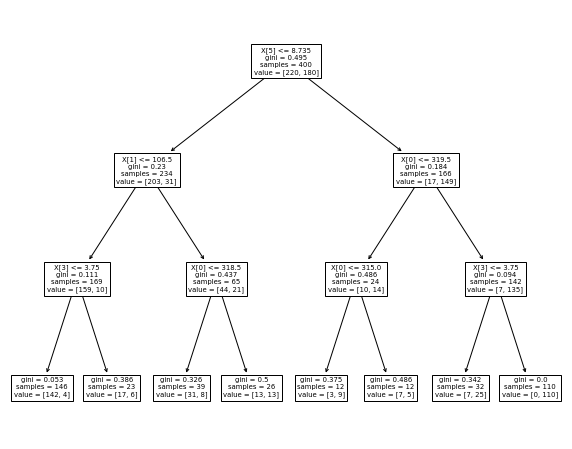

In [ ]:
# Let's set some hyperparameters in Scikit-learn to prevent overfitting

"""
max_depth: the maximum allowed depth
max_features: the maximum number of features considered at each split; 
min_impurity_decrease: the decrease in impurity must be higher than this threshold to split a node
min_impurity_split: when the impurity at a node is lower than this threshold, the node becomes a leaf
min_samples_leaf: the minimum number of samples required for a leaf node; 
min_samples_split: the minimum number of samples required to split a node; 
"""

dt_smaller = DecisionTreeClassifier(
	max_depth=3, 
	min_samples_leaf=10, 
	min_samples_split=10
)
dt_smaller.fit(features, labels)

plt.figure(figsize=(10,8))
plot_tree(dt_smaller);

In [ ]:
dt_smaller.predict([[320, 110, 3, 4.0, 3.5, 8.9, 0]]) # The model (tree) predicts that this student will be admitted


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Ensemble

Ensemble methods:
- **Bagging**: constructing a few models in a random way and joining them together; 
- Examples: Random forests
- **Boosting**: building these models in a smarter way by picking each model strategically to focus on the previous models' mistakes.
- Examples: AdaBoost, Gradient boosting, XGBoost.  

Ensemble methods combine several weak learners (models) into a strong learner (model). 

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import utils

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

np.random.seed(0)



In [ ]:
emails = np.array([
    [7,8,1],
    [3,2,0],
    [8,4,1],
    [2,6,0],
    [6,5,1],
    [9,6,1],
    [8,5,0],
    [7,1,0],
    [1,9,1],
    [4,7,0],
    [1,3,0],
    [3,10,1],
    [2,2,1],
    [9,3,0],
    [5,3,0],
    [10,1,0],
    [5,9,1],
    [10,8,1],
])
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset.head()

,Lottery,Sale,Spam
0,7,8,1
1,3,2,0
2,8,4,1
3,2,6,0
4,6,5,1


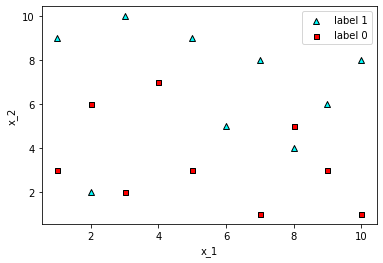

In [ ]:
features = spam_dataset[['Lottery', 'Sale']]
labels = spam_dataset['Spam']
utils.plot_points(features, labels)

In [ ]:
# An example of overfitting the decision tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
decision_tree_classifier.fit(features, labels)
decision_tree_classifier.score(features, labels)

1.0

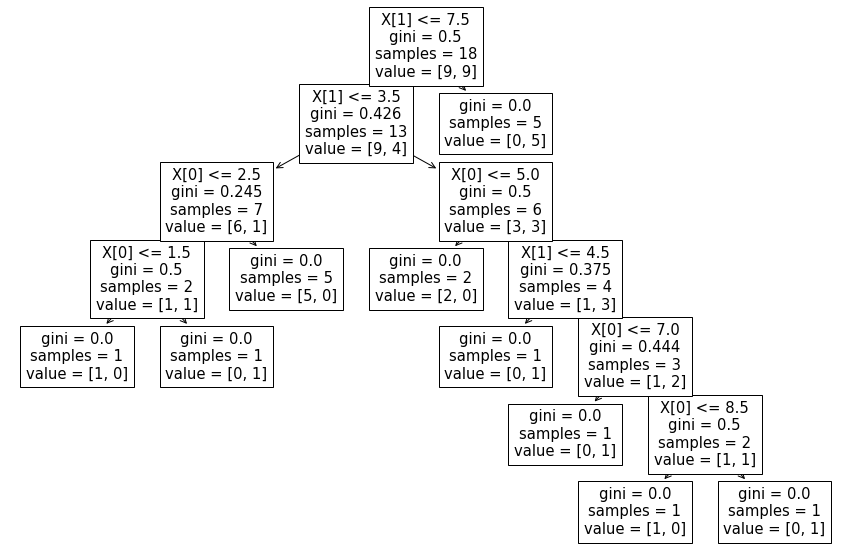

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10));
plot_tree(decision_tree_classifier);

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


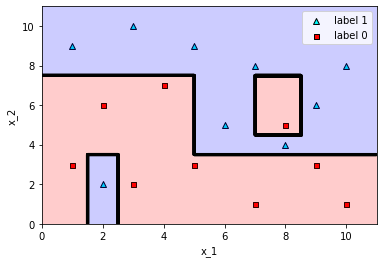

In [ ]:
utils.plot_model(features, labels, decision_tree_classifier)

In [ ]:
# Then, let's train a random forest to get a better fit

from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(
	random_state=0, 
	n_estimators=5, # We want 5 weak learners 
	max_depth=1)
random_forest_classifier.fit(features, labels)
random_forest_classifier.score(features, labels)

0.8333333333333334

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


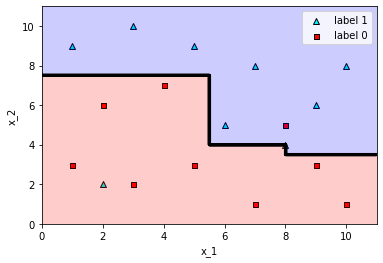

In [ ]:
utils.plot_model(features, labels, random_forest_classifier)

****************************** Estimator ******************************


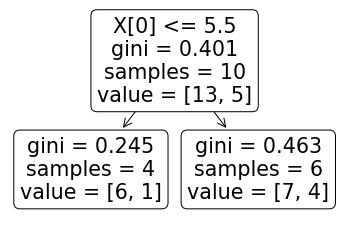

c:\Users\evgen\Desktop\Statistics_manual\utils.py:37: UserWarning: No contour levels were found within the data range.
  pyplot.contour(xx, yy, Z,colors = 'k',linewidths = 3)


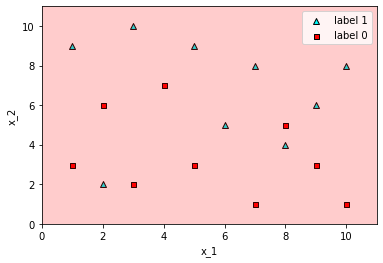

****************************** Estimator ******************************


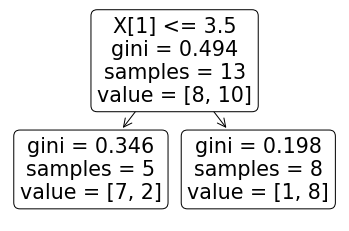

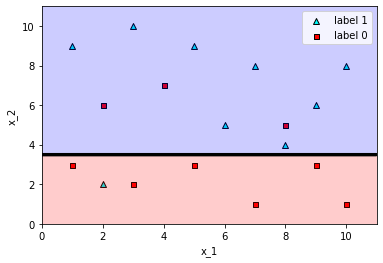

****************************** Estimator ******************************


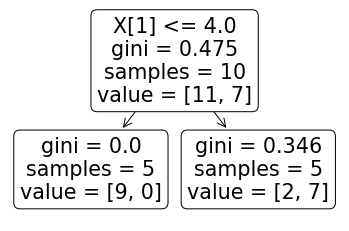

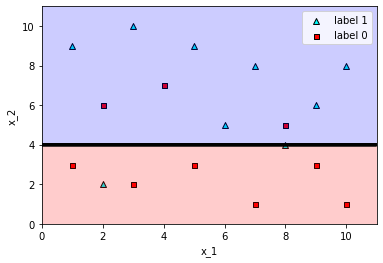

****************************** Estimator ******************************


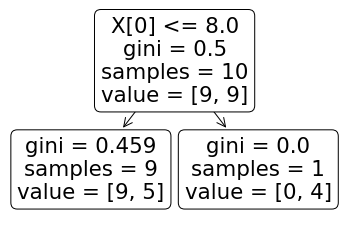

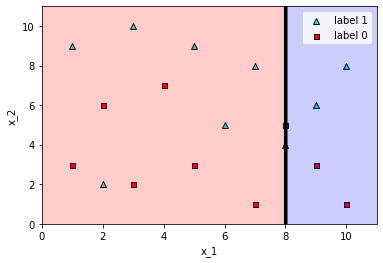

****************************** Estimator ******************************


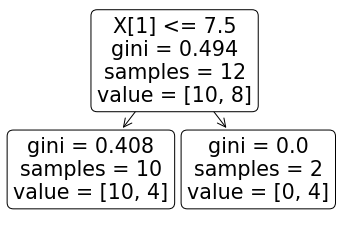

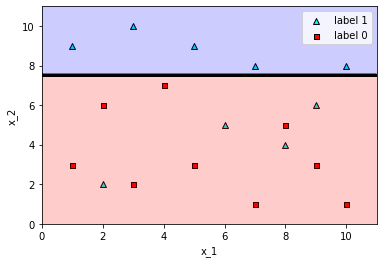

In [ ]:
for dt in random_forest_classifier.estimators_:
    print("*"*30, "Estimator", "*"*30)
    tree.plot_tree(dt, rounded=True)
    plt.show()
    utils.plot_model(features, labels, dt)
    plt.show()

# Below, we can see that the weak learner number 1 is not useful, as it simply classifies all points as ham


## classification with tensorflow

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

train_path = tf.keras.utils.get_file(
	'iris_training.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv'
)

test_path = tf.keras.utils.get_file(
	'iris_test.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv'
)

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
print(train.head())

train_y = train.pop('Species')
test_y = test.pop('Species')
train.head()

def input_fn(features, labels, training=True, batch_size=256):
	dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
	# Shuffle and repeat if you are in training mode
	if training:
		dataset = dataset.shuffle(1000).repeat()
	return dataset.batch(batch_size)

my_feature_columns = []
for key in train.keys():
	my_feature_columns.append(tf.feature_column.numeric_column(key=key))

# deep neural network (DNN)
# Linear classifier 

classifier = tf.estimator.DNNClassifier(
	feature_columns=my_feature_columns,
	# Two hidden layers of 30 and 10 nodes respectively
	hidden_units = [30, 10],
	# The model must choose between 3 classes
	n_classes=3
)

classifier.train(
	input_fn= lambda: input_fn(train, train_y, training=True), 
	steps=5000
)

eval_result = classifier.evaluate(input_fn = lambda: input_fn(test, test_y, training=False))


   SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          6.4         2.8          5.6         2.2        2
1          5.0         2.3          3.3         1.0        1
2          4.9         2.5          4.5         1.7        2
3          4.9         3.1          1.5         0.1        0
4          5.7         3.8          1.7         0.3        0
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\evgen\\AppData\\Local\\Temp\\tmp6xidqhv1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_dela

In [ ]:
print(f'Test set accuracy: {eval_result}')

Test set accuracy: {'accuracy': 0.93333334, 'average_loss': 0.3733698, 'loss': 0.3733698, 'global_step': 5000}


In [ ]:
def input_fn(features, batch_size=256):
	return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

predict = {
	'SepalLength': [6.4],
	'SepalWidth': [2.8],
	'PetalLength': [5.6], 
	'PetalWidth': [2.2],
}

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
	print(pred_dict)
	class_id = pred_dict['class_ids'][0]
	probability = pred_dict['probabilities'][class_id]
	print(f"Prediction is {SPECIES[class_id], 100*probability}")

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\evgen\AppData\Local\Temp\tmp6xidqhv1\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([-2.007372 ,  1.3968128,  2.7342505], dtype=float32), 'probabilities': array([0.00686296, 0.20650472, 0.78663236], dtype=float32), 'class_ids': array([2], dtype=int64), 'classes': array([b'2'], dtype=object), 'all_class_ids': array([0, 1, 2]), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
Prediction is ('Virginica', 78.66323590278625)


# Unsupervised ML

## PCA

PCA is a technique to show ways in which different variables vary together (covary).

Applications:
- Visualisation of high-dimensional data;
- Dimensionality reduction for speeding up ML model training;

Terms:
- Principal component: a linear combination of the predictor variables
- Screeplot: a plot of the components' variance


In PCA analysis, standardizing data is very important!


### PCA (Visual) 1

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

cancer = load_breast_cancer()
print( cancer.keys() )
print(cancer['target'])
print(len(cancer['target']))
print(list(cancer['target']).count(0)) # Malignant is 0

print(cancer['DESCR'])

df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [26]:
# Instead of StandardScaler, we could have used MinMaxScaler
scaler = StandardScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)
scaled_data



array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [27]:
pca = PCA(
	n_components=2
	)
pca.fit(scaled_data)


PCA(n_components=2)

In [28]:
x_pca = pca.transform(scaled_data)

print(scaled_data.shape)
print(x_pca.shape)

(569, 30)
(569, 2)


In [29]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [44]:
df_pca = pd.DataFrame({
	'Component 1': x_pca[:,0],
	'Component 2': x_pca[:,1],
	'Target': cancer['target']
})

df_pca['Labels'] = df_pca['Target'].apply( lambda x: 'Malignant' if x==0 else 'Benign' )
df_pca

,Component 1,Component 2,Target,Labels
0,9.192837,1.948583,0,Malignant
1,2.387802,-3.768172,0,Malignant
2,5.733896,-1.075174,0,Malignant
3,7.122953,10.275589,0,Malignant
4,3.935302,-1.948072,0,Malignant
...,...,...,...,...
564,6.439315,-3.576817,0,Malignant
565,3.793382,-3.584048,0,Malignant
566,1.256179,-1.902297,0,Malignant
567,10.374794,1.672010,0,Malignant


Text(0, 0.5, 'Second principle component')

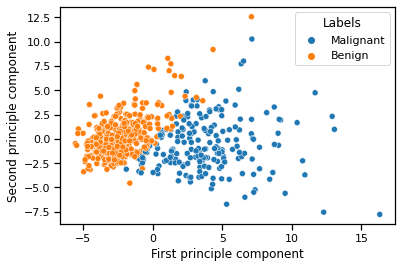

In [46]:
sns.set_context('notebook')
sns.scatterplot( x=df_pca['Component 1'], y=df_pca['Component 2'], hue=df_pca['Labels'] )
plt.xlabel('First principle component')
plt.ylabel('Second principle component')


### PCA (Visual) 2

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [48]:
df = sns.load_dataset('iris')
# In this dataset, we have 4 features (dimensions)
df



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [55]:
# Let's separate features and target into different variables
x = df.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df.loc[:, ['species']].values

print(x[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[['setosa']
 ['setosa']
 ['setosa']
 ['setosa']
 ['setosa']]


In [57]:
# Standardise the features
x = StandardScaler().fit_transform(x)
print(x[:5])


[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [63]:
# PCA projection to 2D

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
print(principalComponents[:5])
df_pca = pd.DataFrame(data=principalComponents, columns = ['principal component 1', 'principal component 2'])
df_pca
df_pca2 = pd.concat( [df_pca, df[['species']]], axis=1 )
df_pca2

[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]


,principal component 1,principal component 2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

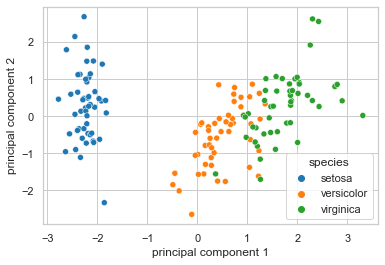

In [66]:
sns.set_style('whitegrid')

sns.scatterplot(
	x=df_pca2['principal component 1'],
	y=df_pca2['principal component 2'], 
	hue=df_pca2['species']
	)


In [76]:
# Explained variance - how much information (variance) 
# can be attributed to each of the principal components

# Variance of the first and then second component
expvar = pca.explained_variance_ratio_ 
print(f"Total variance explained by 2 components: {sum(expvar)*100:.2f}%")
for i,j in enumerate(expvar):
	print(f" - Component {i}: {j*100:.2f}% of variance")

print(f"The rest of the variance ({100 - sum(expvar)*100:.2f}%) is explained by the third and fourth components.")

Total variance explained by 2 components: 95.81%
 - Component 0: 72.96% of variance
 - Component 1: 22.85% of variance
The rest of the variance (4.19%) is explained by the third and fourth components.


### PCA (dimred) 1

In [14]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [6]:
print(dir(fetch_openml))

['__annotations__', '__builtins__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


In [5]:
mnist = fetch_openml('MNIST_784')



In [9]:
# 70k images, 784 features (28x28)
print( mnist.data.shape )
# 1 label
print( mnist.target.shape )


(70000, 784)
(70000,)


In [12]:
# Do the 80-20 train-test split

train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)


In [13]:
# Standardise the data for PCA
scaler = StandardScaler()
# fit on training set only
scaler.fit(train_img)
# apply transform to both the training set and test set
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)


In [18]:
# apply PCA

# make an instance of the model
pca = PCA(0.95) # choose the minimum number of principal components such that 95% of variance is retained
# fit PCA on the training set
pca.fit(train_img)
# Find out how many components were chosen
pca.n_components_


327

In [19]:
# Apply transform to both training and test set
train_img, test_img = pca.transform(train_img), pca.transform(test_img)


In [27]:
train_img.shape


(60000, 327)

In [21]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver="lbfgs")
logisticRegr.fit(train_img, train_lbl)


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [23]:
logisticRegr.predict(test_img[:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [25]:
# Measure performance
from sklearn.metrics import accuracy_score

accuracy_score(logisticRegr.predict(test_img), test_lbl)



0.9201

## Clustering

Kleinberg theorem: three properties which should be possessed by a correct clustering algorithm. Author proves in this theorem that the algorithm possessing all three properties at once doesn't exist. 

1. Scale-Invariance: If we transform the data so that everything is stretched out equally in all directions, then the clustering result shouldn’t change.
2. Consistency: If we stretch the data so that the distances between clusters increase and/or the distances within clusters decrease, then the clustering result shouldn’t change.
3. Richness: The clustering function should theoretically be able to produce any arbitrary partition/clustering of datapoints (in the absence of knowing the pairwise distance between any two points)

<u>Metrics of clustering</u>:


**Naive clustering algorithm**:


### K-Mean Clustering

Terms:
- Cluster: a group of datapoints that are similar across their features;
- K: the number of clusters;
- Inertia: a metric of clustering performance; the sum of squared distances of samples to their closest cluster center.




#### Example 1

,Width,Length
0,38.161401,146.317578
1,25.377146,148.724228
2,17.978231,164.671875
3,15.780424,155.179776
4,46.276362,158.907308


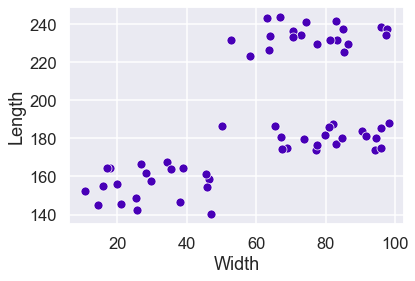

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans

df = pd.DataFrame({
	'Width': [ random.uniform(10,49) for i in range(20) ]   + [ random.uniform(50,100) for i in range(20) ]  + [random.uniform(50,100) for i in range(20)],
	'Length': [ random.uniform(140,169) for i in range(20)] + [ random.uniform(170,189) for i in range(20) ] + [random.uniform(220,250) for i in range(20) ]
})

sns.scatterplot( x=df['Width'], y=df['Length'] )

df.head()

[[ 62.23448606 190.32044356]]
       Width      Length  cluster
0  38.161401  146.317578        0
1  25.377146  148.724228        0
2  17.978231  164.671875        0
3  15.780424  155.179776        0
4  46.276362  158.907308        0
[[ 30.20646959 157.32359691]
 [ 79.48034109 208.08797637]]
       Width      Length  cluster
0  38.161401  146.317578        0
1  25.377146  148.724228        0
2  17.978231  164.671875        0
3  15.780424  155.179776        0
4  46.276362  158.907308        0
[[ 29.20749662 155.86964658]
 [ 76.50238155 234.39621238]
 [ 80.99358001 180.69547171]]
       Width      Length  cluster
0  38.161401  146.317578        0
1  25.377146  148.724228        0
2  17.978231  164.671875        0
3  15.780424  155.179776        0
4  46.276362  158.907308        0
[[ 29.20749662 155.86964658]
 [ 65.69791646 234.9316235 ]
 [ 80.99358001 180.69547171]
 [ 87.30684665 233.86080125]]
       Width      Length  cluster
0  38.161401  146.317578        0
1  25.377146  148.724228  

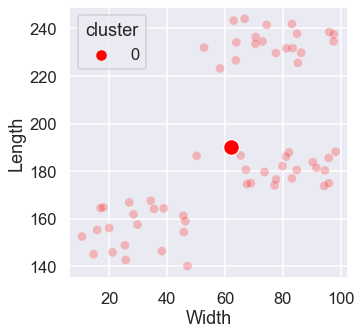

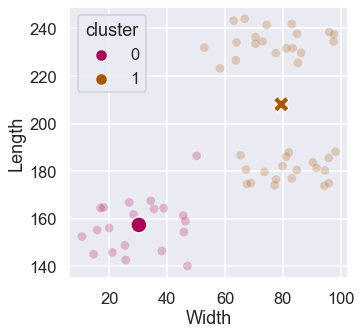

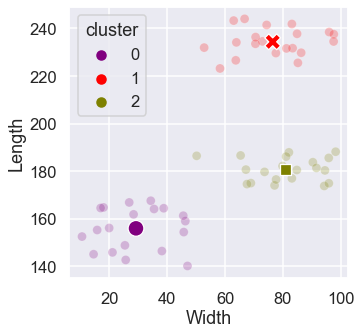

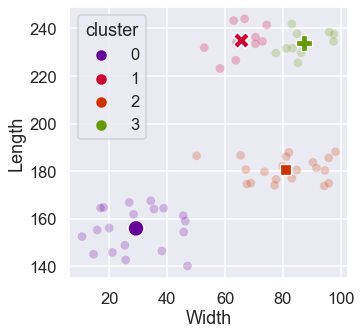

In [209]:

def plot_K_centers(df, K):
	df_cp = df.copy()

	kmeans = KMeans(n_clusters=K).fit(df_cp)

	# cluster labels
	df_cp['cluster'] = kmeans.labels_

	# cluster centers
	centers = kmeans.cluster_centers_
	print(centers)

	plt.figure(figsize=(5,5))
	sns.scatterplot(
		x=df_cp['Width'], y=df_cp['Length'], 
		hue=df_cp['cluster'], 
		# palette=['red', 'blue', 'green']
		palette=sns.color_palette('brg', n_colors=K),
		alpha=0.23
		)


	print( df_cp.head() )

	df_cp_centers = pd.DataFrame({
		'Width': centers[:,0],
		'Length': centers[:,1],
	})
	lista = ['^', 's', 'X', '*' ]
	df_cp_centers['markers'] = lista[:K]

	# markers = ['^', 's', 'X' ]
	# for i,j in enumerate(centers):
	# 	print(i, j[0], j[1], j[2])
	# 	plt.plot( j[0], j[1], marker=markers[i], color='black', markersize=10 )

	# plt.legend(['Cluster 0 (red)', 'Cluster 1 (Blue)', 'Cluster 2 (Green)'])

	sns.scatterplot(
		x=df_cp_centers['Width'], y=df_cp_centers['Length'], 
		# color='black', 
		style=df_cp_centers['markers'], 
		s=250,
		legend=False,
		hue=df_cp_centers['markers'],
		palette=sns.color_palette('brg', n_colors=K)
		)

plot_K_centers(df, 1)
plot_K_centers(df, 2)
plot_K_centers(df, 3)
plot_K_centers(df, 4)

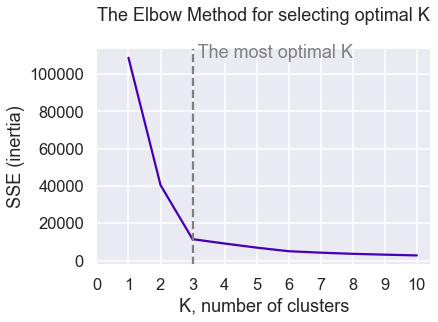

In [220]:
# Let's determine the most optimal K by using the elbow method


df_cp = df.copy()

sse = {} # Sum of squared error
for i in range(1, 11):
	kmeans = KMeans(n_clusters=i).fit(df_cp)
	sse[i] = kmeans.inertia_

plt.figure()
sns.lineplot( x=sse.keys(), y=sse.values() )
plt.xticks(range(11));
plt.ylabel('SSE (inertia)')
plt.xlabel('K, number of clusters')
plt.axvline(3, color='grey', ls='--')
plt.text(3, max(sse.values()), ' The most optimal K', color='grey')
plt.title('The Elbow Method for selecting optimal K\n');


# Deep Learning


Neural networks; also called multilayer perceptrons. Field that uses NN - Deep Learning. 

Has input layer, hidden layers, and output layer. Hidden layer adds a layer of complexity in order to be able to recognise patterns. 

Below: $w$, weight; $b$, constant; $f(x)$, activation function; $y_{1}$, output. 

$$ \sum_{i=1}^{n} ( x_{i} w_{i} + b_{i} ) => f(x) => y_{1} $$

<img src="Media/NN.png" width=400>

Examples of NN applications: 
- Detect fraud in banks; 
- Microscope - recognise cancer cells; 
- Recognise voice; 
- Classification; 
- Image recognition; datasets - MNIST, CIFAR-10, CIFAR-100; 
- Chat bots. 

Training neural networks:
Neural networks consist of architecture (neurons and their connections) and their weights. 

Optimisation - adjusting weights. 

Backpropagation of the error - algorithm to teach NN: error from output layer propagates back, adjusting weights. 

Overfitting. 



In a sense, NN is like a collection of perceptrons (linear classifier) that gives rise to nonlinear classification. 

Neural Network is a combination of perceptrons (neurons). 

Training a Neural Network:
1. Begin by initialising all the weights and biases at random; 
2. Define an error function to measure the performance of the neural network; 
3. We repeatedly use the error function to tune in the weights and biases of the model to reduce the error function; 

Error function, e.g. log loss function:
$$ logLoss = -y ln(\hat{y}) - (1-y)ln(1-\hat{y})) $$


Types of NN:

| Type | Description | Image classification |
| - | - | - |
| Dense NN (DNN) | it is connected to every node from the previous layer. | For this image classification project, the DNN looks at the whole picture at once, and learns patterns. DNN is very important for global patterns, but not for local patterns. E.g. if you flip the picture, it won't recognise the pattern again.  | 
| Convolutional NN (CNN) | First start with small patterns, then in the next layers combine those smaller features to check presence of bigger features. | Looks for local patterns in image classification, and then searches for these patterns in the other areas of testing data. |


Optimisation function - implements the backpropagation algorithm. 
- Gradient Descent; 
- Stochastic Gradient Descent; 
- Mini-batch gradient descent; 
- momentum; 
- Nesterov accelerated gradient; 


## Tensorflow

Tensor - a vector of some dimensionality. 

Rank / degree - the number of dimensions involved in the tensor. 

Types of tensors:
- variable: mutable
- constant: immutable
- placeholder: immutable
- SparseTensor: immutable



In [ ]:
import tensorflow as tf

In [ ]:
# Some tensors of rank 0 (scalar)
string = tf.Variable('this is a string', tf.string)
number = tf.Variable(324, tf.int16)
floating = tf.Variable(3.567, tf.float64)

# tensors of higher rank
rank1_tensor = tf.Variable(['test', 'ok', 'tim'], tf.string)
rank2_tensor = tf.Variable([['test', 'ok', 'two'], ['test', 'yes', 'no']], tf.string)

# Print the rank of a tensor
print(tf.rank(rank2_tensor))

tf.Tensor(2, shape=(), dtype=int32)


In [ ]:
# Shape of a tensor - how many values there are in each dimension
rank2_tensor.shape

TensorShape([2, 3])

In [ ]:
# Changing shape of a tensor
tensor1 = tf.ones([1,2,3]) # Create a tensor full of ones of shape [1,2,3]
print(tensor1)

tensor2 = tf.reshape(tensor1, [2,3,1])
print(tensor2)

tensor3 = tf.reshape(tensor2, [3, -1])
print(tensor3)

tensor4 = tf.reshape(tensor1, [6])
print(tensor4)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)
tf.Tensor([1. 1. 1. 1. 1. 1.], shape=(6,), dtype=float32)


In [5]:
# Create a dataset from your own data
# by using a keras pipeline
import tensorflow as tf
tf.keras.utils.image_dataset_from_directory??
# data = tf.keras.utils.image_dataset_from_directory('data')
# If you have a ton of images, you can use iterator
# data_iterator = data.as_numpy_iterator()
# batch = data_iterator.next()
# Scale data
#  data = data.map(lambda x,y: (x/255, y))
# Train-test split
# train_size = int(len(data)*0.7)
# test_size = int(len(data)*0.1)+1
# val_size = int(len(data)*0.2)+1
# train = data.take(train_size)
# val = data.skip(train_size).take(val_size)
# test = data.skip(train_size+val_size).take(test_size)

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



## Classificate 1

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(1)
from sklearn.model_selection import train_test_split

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_10_Neural_Networks/one_circle.csv', index_col=0)
df

,x_1,x_2,y
0,-0.759416,2.753240,0
1,-1.885278,1.629527,0
2,2.463302,-1.023869,0
3,-1.986004,-0.898810,0
4,2.010834,-2.580117,0
...,...,...,...
105,-1.376637,2.778703,1
106,-0.703722,0.215382,1
107,0.729767,-2.479655,1
108,-1.715920,-0.393404,1


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

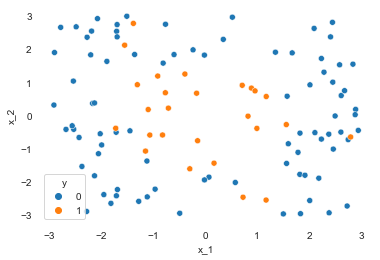

In [64]:
x = np.array(df[['x_1', 'x_2' ]])
y = np.array(df['y']).astype(int)
df

sns.scatterplot( data=df, x='x_1', y='x_2', hue='y' )
y

In [70]:
# Preprocessing the data

## categorizing the output, so that the shapes of features and label coincide

from tensorflow.keras.utils import to_categorical
categorized_y = np.array(to_categorical(y, 2))
categorized_y[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [78]:
# Train-test split

print( f"Total n of observations: {len(categorized_y)}")
x_train, x_test = x[:90], x[90:]
y_train, y_test = categorized_y[:90], categorized_y[90:]
print(f"x_train: {len(x_train)} | y_train: {len(y_train)}")
print(f"x_test: {len(x_test)} | y_test: {len(y_test)}")

Total n of observations: 110
x_train: 90 | y_train: 90
x_test: 20 | y_test: 20


In [79]:
# Building and compiling the neural network

# Imports
#import numpy as np
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, Dropout, Activation
#from tensorflow.keras.optimizers import SGD

# Building the model
model = Sequential()
# first hidden layer with ReLU activation function
model.add(Dense(128, activation='relu', input_shape=(2,)))
# Dropout with probability of 0.2
model.add(Dropout(.2))
# Second hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
# Output layer with a softmax activation function
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(
	loss = 'categorical_crossentropy', # Loss function 
	optimizer='adam', # Built-in tricks: Adam, SGD, RMSProp, AdaGrad
	metrics=['accuracy']) # Metric to report at each epoch
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 2)                 130       
                                                                 
Total params: 8,770
Trainable params: 8,770
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Training the neural network

model.fit(
	x_train, # Features
	y_train, # Labels
	epochs=100, # The number of times we run backpropagation on our whole dataset
	batch_size=10) 

Epoch 1/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0815 - accuracy: 0.9667
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0515 - accuracy: 0.9889
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9889
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 1.0000
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0274 - accuracy: 1.0000
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 1.0000
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 1.0000
Epoch 9/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0436 - accuracy: 0.9889
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9889
Epoch 11/100
9/9 [===========

In [98]:
model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 31ms/step - loss: 3.2553 - accuracy: 0.5000


[3.2552921772003174, 0.5]

In [ ]:
# Now let's visualise the clustering of classification as per the model

4/4 [==============================] - 0s 5ms/step


<AxesSubplot:xlabel='x_1', ylabel='x_2'>

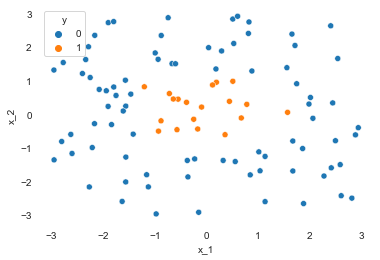

In [99]:
import random

features_predict = np.array( [ [random.uniform(-3,3), random.uniform(-3,3)] for i in range(100) ] )
labels_predict = np.array( model.predict(features_predict) )
# features_predict
labels_predict2 = [np.argmax(pred) for pred in labels_predict]
labels_predict2

df_predictions = pd.DataFrame({
	'x_1': features_predict[:,0],
	'x_2': features_predict[:,1],
	'y': labels_predict2
})
df_predictions

sns.scatterplot(data=df_predictions, x='x_1', y='x_2', hue='y')

## Fashion MNIST



In [ ]:
import tensorflow as tf
from tensorflow import keras
# import keras
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(f"Train dataset: {train_images.shape}")
print(f"Test dataset: {test_images.shape}")
# So, 60,000 images made up of 28x28 pixels (784 in total)

Train dataset: (60000, 28, 28)
Test dataset: (10000, 28, 28)


In [ ]:
# Let's take a look at one pixel
train_images[0,23,23]
# Pixel values are in the range 0-255 (black-white), in the grayscale; 

194

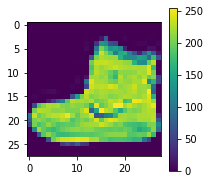

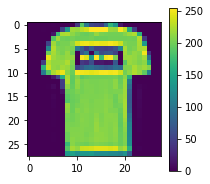

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
				'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(0,2):
	plt.figure(figsize=(3,3))
	plt.imshow(train_images[i])
	plt.colorbar()
	plt.grid(False)
	plt.show()

In [ ]:
# Data preprocessing

# transform greyscale pixel values (0-255) to the range of 0-1. 

train_images = train_images / 255.0
test_images = test_images / 255.0


In [ ]:
# Build the model
model = keras.Sequential([
	keras.layers.Flatten(input_shape=(28,28)), # input layer (1) - flatten into an 728-long array
	keras.layers.Dense(128, activation='relu'), # hidden layer (2)
	keras.layers.Dense(10, activation='softmax') # output layer(3)
])

# sequential NN - input goes from left to right, sequentially

model.compile(
	optimizer='adam', 
	loss='sparse_categorical_crossentropy', 
	metrics=['accuracy']
)


In [ ]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 17s 5ms/step - loss: 0.4950 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3759 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3362 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3114 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2936 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2786 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2664 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2558 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2471 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss: 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print(f"Test accuracy: {test_acc:.3f}")
# can change the number of epochs to see how the test accuracy score changes
# e.g. check epochs = [1, 5, 10]

313/313 [==============================] - 6s 3ms/step - loss: 0.3323 - accuracy: 0.8860
Test accuracy: 0.886


In [ ]:
# Make predictions
print(test_images.shape)
predictions = model.predict(test_images)

# predict just one
# predictions = model.predict([test_images[0]])

print(predictions) # probabilities for each of the outcomes

(10000, 28, 28)
313/313 [==============================] - 5s 4ms/step
[[1.6642846e-06 1.6877376e-09 9.2668795e-10 ... 7.5378490e-04
  6.1002993e-08 9.9796873e-01]
 [3.8647522e-05 4.4284157e-15 9.9983311e-01 ... 1.2522179e-21
  3.6415558e-11 1.1644887e-18]
 [1.4700845e-09 1.0000000e+00 4.2615287e-13 ... 2.0352436e-18
  1.5323963e-14 6.0244623e-18]
 ...
 [2.6763180e-06 6.0508057e-11 7.5937555e-07 ... 9.8304147e-09
  9.9997461e-01 8.2601556e-12]
 [2.7195423e-08 9.9996030e-01 1.7408813e-09 ... 1.2131204e-11
  3.5002782e-11 6.2037053e-10]
 [1.3692455e-05 7.7145607e-08 1.7227226e-06 ... 1.6536206e-03
  2.6462195e-04 1.6251572e-05]]


Actual label:    Bag
Predicted label: Bag
Predictions: [9.5072199e-09 1.5731366e-15 1.5966102e-10 4.6866190e-16 2.4617919e-09
 1.3185823e-07 7.9603768e-11 7.8716119e-15 9.9999988e-01 2.8264598e-21]


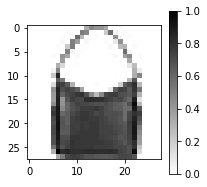

In [ ]:
# e.g. let's check prediction for one of the images
index = 34

print(f"Actual label:    {class_names[ test_labels[index] ]}")
index_label = np.argmax(predictions[index])
print(f"Predicted label: {class_names[index_label]}")
print(f"Predictions: {predictions[index]}")

plt.figure(figsize=(3,3))
plt.imshow(test_images[index], cmap=plt.cm.binary) # 'cmap' parameter makes the figure grayscale
plt.colorbar()
plt.grid(False)
plt.show()



## CNN

Convolutional NN.

E.g. colored image has is x pixels by y pixels, and each pixel has value from 3 color channels (RGB).



In [ ]:
# CIFAR Image Dataset
# contains 60,000 32x32 color images with 6,000 images in each class
# 10 classes - everyday objects: airplane, automobile, birds, cat, etc.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

UsageError: Line magic function `%tensorflow_version` not found.


In [ ]:
# load and split dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


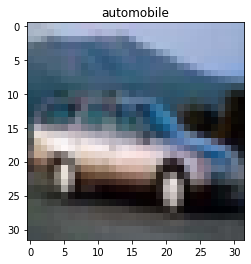

In [ ]:
# let's look at one image
IMG_INDEX = 4

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.title(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [ ]:
# CNN architecture
# build Convolutional Base - extract features
model = models.Sequential()
model.add(layers.Conv2D(
	32, # number of filters
	(3,3), # sample size - how big each filter is
	activation='relu', 
	input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2))) # to reduce dimentionality in this layer; performs max pooling operation using 2x2 samples and stride of 2
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))


model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-tra

In [ ]:
# adding dense layers
# now we need to take these extracted features and add a way to classify them
model.add(layers.Flatten()) # flatten - put into one line
model.add(layers.Dense(64, activation='relu')) # 64-neuron dense layers
model.add(layers.Dense(10))  # output layer - dense layer with 10 neurons, which correspond to 10 classification classes

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)            

In [ ]:
# Training
model.compile(
	optimizer='adam', 
	loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # loss function is sparsecategoricalcrossentropy - the basic loss function
	metrics=['accuracy']
)

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5184 - accuracy: 0.4507 - val_loss: 1.3120 - val_accuracy: 0.5286
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1325 - accuracy: 0.5978 - val_loss: 1.1037 - val_accuracy: 0.6140
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9843 - accuracy: 0.6545 - val_loss: 0.9708 - val_accuracy: 0.6619
Epoch 4/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8830 - accuracy: 0.6932 - val_loss: 0.9466 - val_accuracy: 0.6747
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8110 - accuracy: 0.7168 - val_loss: 0.8698 - val_accuracy: 0.7023
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7492 - accuracy: 0.7365 - val_loss: 0.9319 - val_accuracy: 0.6808
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7025 - accuracy: 0.7528 - val_loss: 0.9020 -

In [ ]:
# evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)
# accuracy around 70%

313/313 - 2s - loss: 0.8739 - accuracy: 0.7122 - 2s/epoch - 6ms/step
0.7121999859809875


In [ ]:
# working with small datasets
# if we don't have millions of images, it is difficult to train CNN well. 
# there are some techniques to train CNN's on small datasets consisting of few thousand images. 

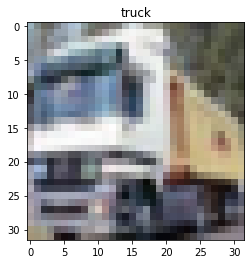

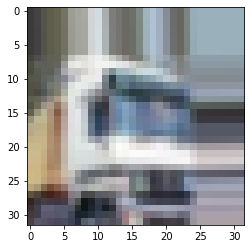

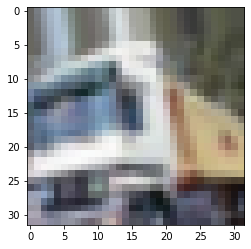

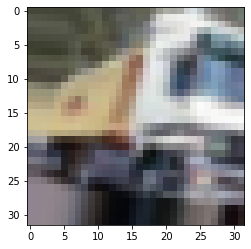

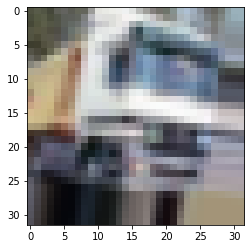

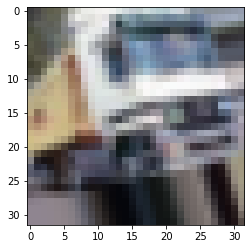

In [ ]:
# Data Augmentation
# performing random transformations on our images so that our model can generalize better
# transformations: compressions, rotations, streches, color changes

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

image_index = 1

# create a data generator object that transforms images
dataget = ImageDataGenerator(
	rotation_range=40, 
	width_shift_range=0.2, 
	height_shift_range=0.2, 
	shear_range=0.2, 
	zoom_range=0.2, 
	horizontal_flip = True, 
	fill_mode = 'nearest'
)

# pick an image to transform
plt.figure()
plt.imshow(train_images[image_index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[image_index][0]])
plt.show()


test_img = train_images[image_index]
img = tf.keras.preprocessing.image.img_to_array(test_img) # convert image to numpy array
img = img.reshape((1,) + img.shape) # reshape image

i = 0

for batch in dataget.flow(img, save_prefix='test', save_format='jpeg'): # this loop runs forever until we break, saving images to curdir
	plt.figure(i)
	plot = plt.imshow(tf.keras.preprocessing.image.img_to_array(batch[0]))
	i += 1
	# show 4 images
	if i > 4:
		break

plt.show()

## CNN-2

In [ ]:
# Pretrained models
"""
We can use pre-trained CNN and use as a part of our model to start our own model; we can finetune it, for our own purposes; 

"""

'\nWe can use pre-trained CNN and use as a part of our model to start our own model; we can finetune it, for our own purposes; \n\n'

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
tfds.disable_progress_bar()

# split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
	'cats_vs_dogs', 
	split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
	with_info=True,
	as_supervised = True,
)
get_label_name = metadata.features['label'].int2str # creates a function object that we can use to get labels


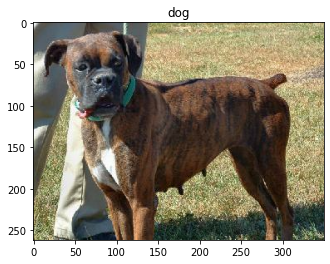

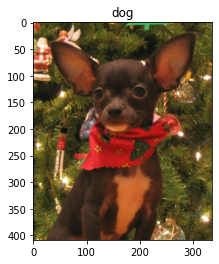

In [ ]:
# display 2 images from the dataset
for image, label in raw_train.take(2):
	plt.figure()
	plt.imshow(image)
	plt.title(get_label_name(label)) 

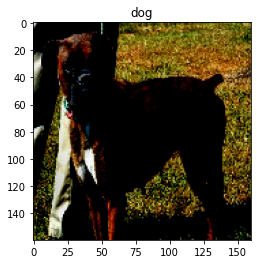

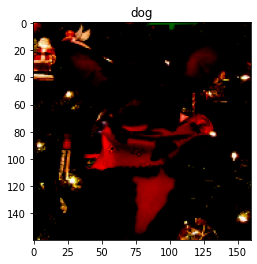

In [ ]:
# data preprocessing
IMG_SIZE = 160 # all images will be resized to IMG_SIZE x IMG_SIZE

def format_example(image, label):
	"""returns an image that's reshaped to IMG_SIZE"""
	image = tf.cast(image, tf.float32)
	image = (image/127.5) -1
	image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
	return image, label

train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

# Let's take a look at some images
for image, label in train.take(2):
	plt.figure()
	plt.imshow(image)
	plt.title(get_label_name(label))

In [ ]:
# Let's compare shapes of original image vs new image
for img, label in raw_train.take(2):
	print(f'Original shape: {img.shape}')

for img, label in train.take(2):
	print(f"New shape: {img.shape}")


Original shape: (262, 350, 3)
Original shape: (409, 336, 3)
New shape: (160, 160, 3)
New shape: (160, 160, 3)


In [ ]:
# picking a pre-trained model
"""
MobileNet V2 (google)
trained on 1.4 million images, 1000 classes in there

we want to use the convolutional base of this model, so we'll specify that we don't want to load the top (classification) layer. 
"""

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
# create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(
	input_shape=IMG_SHAPE, 
	include_top = False, 
	weights='imagenet'
)


In [ ]:
# this base_model will output a shape (32,5,5,1280) tensor that is a feature extraction from our (1,160,160,3) image. 
base_model.summary()


Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [ ]:
for image, _ in train_batches.take(1):
	pass

feature_batch = base_model(image)
print(feature_batch.shape)

NameError: name 'train_batches' is not defined

# NLP

word vectors (word embeddings) - numerical representations of words in multidimensional space through matrices. 

| Sector | Description | 
| - | - |
| Named Entity Recognition | Extraction of specific information from the text. |


## Proj 1

In [8]:
!pip install spacy



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 3.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-11-24 15:48:58.721599: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-11-24 15:48:58.722119: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-24 15:49:01.898720: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-11-24 15:49:01.899514: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-11-24 15:49:01.900054: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-11-24 15:49:01.900583: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [11]:
import spacy

In [12]:
nlp = spacy.load("en_core_web_sm")

In [26]:
with open('example_datasets/NLP/wiki_us.txt', 'r') as f:
	text = f.read()
print(text[:1000])

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.

Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century. The United States emerged from the thirteen British colonies est

In [28]:
# Create "Doc" object
doc = nlp(text)

print(doc[:100])

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to


In [23]:
# Tokenise - split the sentence into individual tokens
# It's like the 'split' function but actually takes into account the context of a sentence, e.g. parentheses, periods, etc.
print("Tokens in plain text:"); print('-'*20)
for token in text[:7]:
	print(token)

print("Tokens in the 'doc' object:"); print('-'*20)
for token in doc[:7]:
	print(token)

Tokens in plain text:
--------------------
T
h
e
 
U
n
i
Tokens in the 'doc' object:
--------------------
The
United
States
of
America
(
U.S.A.


In [37]:
# Sentence Boundary Detection

counter = 1
for sent in doc.sents:
	print(f"Sentence {counter}) {sent}")
	if counter <= 3:
		counter += 1
	else:
		break



Sentence 1) The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.
Sentence 2) It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j]
Sentence 3) At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d]
Sentence 4) The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world.


In [38]:
# convert the generator above into a list
sentence1 = list(doc.sents)[0]
print(sentence1)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.


In [62]:
# Check token's metadata
token2 = sentence1[2]
print(token2)
print(token2.text)
print(token2.left_edge)
print(token2.right_edge)
print(token2.ent_type_) # GPE - geopolitical entity
print(token2.ent_iob_) # I - inside the entity; b - beginning, o - outside the entity; 
print(token2.lemma_) # The original state
print(token2.morph)
print(token2.pos_) # proper noun
print(token2.lang_)

States
States
The
,
GPE
I
States
Number=Sing
PROPN
en


In [59]:
print(sentence1[12])
print(sentence1[12].lemma_) # the original state of the verb 'known' is 'know' 
print(sentence1[12].morph)
print(sentence1[12].pos_)

known
know
Aspect=Perf|Tense=Past|VerbForm=Part
VERB


In [66]:
# Linguistic annotations
text = "Mike enjoys playing football."
doc2 = nlp(text)
print(doc2)

for token in doc2:
	print(token.text, token.pos_, token.dep_)

from spacy import displacy
displacy.render(doc2, style='dep')

Mike enjoys playing football.
Mike PROPN nsubj
enjoys VERB ROOT
playing VERB xcomp
football NOUN dobj
. PUNCT punct


In [68]:
# Named Entity Recognition (NER)

for ent in doc.ents:
	print(ent.text, ent.label_)

The United States of America GPE
U.S.A. GPE
USA GPE
the United States GPE
U.S. GPE
US GPE
America GPE
North America LOC
50 CARDINAL
five CARDINAL
326 CARDINAL
Indian NORP
3.8 million square miles QUANTITY
9.8 million square kilometers QUANTITY
third- or fourth DATE
The United States GPE
Canada GPE
Mexico GPE
Bahamas GPE
Cuba GPE
more than 331 million CARDINAL
third ORDINAL
Washington GPE
D.C. GPE
New York GPE
Paleo-Indians NORP
Siberia LOC
North American NORP
at least 12,000 years ago DATE
European NORP
the 16th century DATE
The United States GPE
thirteen CARDINAL
British NORP
the East Coast LOC
Great Britain GPE
the American Revolutionary War ORG
1775â€“1783 CARDINAL
the late 18th century DATE
U.S. GPE
North America LOC
Native Americans NORP
1848 DATE
the United States GPE
United States GPE
the second half of the 19th century DATE
the American Civil War ORG
The Spanishâ€“American War and World War I EVENT
U.S. GPE
World War II EVENT
the Cold War EVENT
the United States GPE
the Korean 

In [69]:
displacy.render(doc, style='ent')

In [ ]:
# Word vectors

In [70]:
!python -m spacy download en_core_web_md

2022-11-24 17:40:39.241241: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-11-24 17:40:39.241535: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-24 17:40:45.822347: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-11-24 17:40:45.822945: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-11-24 17:40:45.823575: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-11-24 17:40:45.824154: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu


     ---------------------------------------- 42.8/42.8 MB 8.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [75]:
import spacy
import numpy as np


In [77]:
nlp = spacy.load('en_core_web_md')

with open("example_datasets/NLP/wiki_us.txt", "r") as f:
	text = f.read()

doc = nlp(text)
sentence1 = list(doc.sents)[0]
print(sentence1)

your_word = "country"
ms = nlp.vocab.vectors.most_similar(
	np.asarray([nlp.vocab.vectors[nlp.vocab.strings[your_word]]]), n=10
)
words = [nlp.vocab.strings[w] for w in ms[0][0]]
distances = ms[2]
print(words)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.
['country—0,467', 'nationâ\x80\x99s', 'countries-', 'continente', 'Carnations', 'pastille', 'бесплатно', 'Argents', 'Tywysogion', 'Teeters']


In [78]:
doc1 = nlp("I like salty fries and hamburgers.")
doc2 = nlp("Fast food tastes very good.")

print(doc1, "<->", doc2, doc1.similarity(doc2))

I like salty fries and hamburgers. <-> Fast food tastes very good. 0.691649353055761


In [79]:
doc3 = nlp("The Empire State Building is in New York.")
doc1.similarity(doc3)

0.1766669125394067

In [80]:
doc4 = nlp("I enjoy oranges.")
doc5 = nlp("I enjoy apples.")
doc4.similarity(doc5)
# semantic similarity of the words

0.9775702131220241

### Pipelines

In [81]:
nlp = spacy.blank('en')
nlp.add_pipe('sentencizer')
nlp.analyze_pipes()

{'summary': {'sentencizer': {'assigns': ['token.is_sent_start', 'doc.sents'],
   'requires': [],
   'scores': ['sents_f', 'sents_p', 'sents_r'],
   'retokenizes': False}},
 'problems': {'sentencizer': []},
 'attrs': {'doc.sents': {'assigns': ['sentencizer'], 'requires': []},
  'token.is_sent_start': {'assigns': ['sentencizer'], 'requires': []}}}

### EntityRuler

In [82]:
import spacy


In [92]:
nlp = spacy.load("en_core_web_sm")
text = "West Chestertenfieldville was referenced in Mr. Deeds."
doc = nlp(text)

# ML learning prediction of ent label
for ent in doc.ents:
	print(ent.text, ent.label_)

# make a ruler to correct some mistakes
ruler = nlp.add_pipe("entity_ruler", before="ner") # place ner after entity_ruler 
nlp.analyze_pipes()

West Chestertenfieldville GPE
Deeds PERSON


{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'entity_ruler': {'assigns': ['doc.ents', 'token.ent_type', 'token.ent_iob'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ent

In [93]:
patterns = [
	{"label":"GPE", "pattern":"West Chestertenfieldville"}, 
	{"label":"FILM", "pattern":"Mr. Deeds"}
]
ruler.add_patterns(patterns)
doc2 = nlp(text)
for ent in doc2.ents:
	print(ent.text, ent.label_)

West Chestertenfieldville GPE
Mr. Deeds FILM


### Matcher

In [1]:
import spacy
from spacy.matcher import Matcher


In [3]:
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)
pattern = [{"LIKE_EMAIL":True}]
matcher.add("EMAIL_ADDRESS", [pattern])

doc = nlp("This is an email address: wmattingly@aol.com")
matches = matcher(doc)
print(matches)

print(nlp.vocab[matches[0][0]].text)


[(16571425990740197027, 6, 7)]
EMAIL_ADDRESS


In [12]:
with open("example_datasets/NLP/wiki_mlk.txt", "r") as f:
	text = f.read()

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)
pattern = [{
	"POS": "PROPN", # Proper nouns 
	"OP": "+" # 
	},
	{"POS": "VERB"} # After a proper noun should come a verb
	]
matcher.add(
	"PROPER_NOUN", [pattern],
	greedy='LONGEST' # Get the longest pattern 
	)
doc = nlp(text)
matches = matcher(doc)
matches.sort(key=lambda x: x[1]) # Sort by the first index (start token)
# how many matches
print(len(matches))
# print(matches)
for match in matches[:10]:
	print(match, doc[match[1]:match[2]])

8
(451313080118390996, 50, 52) King advanced
(451313080118390996, 90, 92) King participated
(451313080118390996, 114, 116) King led
(451313080118390996, 168, 170) King helped
(451313080118390996, 199, 201) SCLC put
(451313080118390996, 248, 253) Director J. Edgar Hoover considered
(451313080118390996, 323, 325) King won
(451313080118390996, 486, 489) United States beginning


In [13]:
import json
with open('example_datasets/NLP/alice.json', 'r') as f:
	data = json.load(f)

text = data[0][2][0]
print(text)

Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, `and what is the use of a book,' thought Alice `without pictures or conversation?'


In [21]:
# grab all the quotation marks
text = text.replace("`", "'")
print(text)

speak_lemmas = ["think", "say"]

matcher = Matcher(nlp.vocab)
pattern = [
	{"ORTH": "'"}, # start with a quotation mark
	{"IS_ALPHA": True, "OP": "+"}, # has alphabetic character (1 or more)
	{"IS_PUNCT": True, "OP": "*"}, # punctuation mark
	{"ORTH": "'"}, # ends with a quotation mark
	{"POS": "VERB", "LEMMA": {"IN": speak_lemmas}},
	{"POS": "PROPN", "OP": "+"},
	{"ORTH": "'"}, # start with a quotation mark
	{"IS_ALPHA": True, "OP": "+"}, # has alphabetic character (1 or more)
	{"IS_PUNCT": True, "OP": "*"}, # punctuation mark
	{"ORTH": "'"}, # ends with a quotation mark
	]
matcher.add(
	"PROPER_NOUN", [pattern],
	greedy='LONGEST' # Get the longest pattern 
	)
doc = nlp(text)
matches = matcher(doc)
matches.sort(key=lambda x: x[1]) # Sort by the first index (start token)
# how many matches
print(len(matches))
for match in matches[:10]:
	print(match, doc[match[1]:match[2]])

However, this bottle was NOT marked 'poison,' so Alice ventured to taste it, and finding it very nice, (it had, in fact, a sort of mixed flavour of cherry-tart, custard, pine-apple, roast turkey, toffee, and hot buttered toast,) she very soon finished it off.
0


In [23]:
for text in data[0][2]:
	text = text.replace("`", "'")
	doc = nlp(text)
	matches = matcher(doc)
	matches.sort(key = lambda x: x[1])
	for match in matches[:10]:
		print(match, doc[match[1]:match[2]])

(451313080118390996, 47, 67) 'and what is the use of a book,' thought Alice 'without pictures or conversation?'


### Custom Components

In [31]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Britain is a place. Mary is a doctor.")

for ent in doc.ents:
	print(ent.text, ent.label_)

Britain GPE
Mary PERSON


In [32]:
from spacy.language import Language

@Language.component("remove_gpe")
def remove_gpe(doc):
	original_ents = list(doc.ents)
	for ent in doc.ents:
		if ent.label_ == 'GPE':
			original_ents.remove(ent)
	doc.ents = original_ents
	return doc

nlp.add_pipe("remove_gpe")
nlp.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'remove_gpe': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False}},
 'problems': {'tok2vec': [],
  

In [33]:
doc = nlp("Britain is a place. Mary is a doctor.")
for ent in doc.ents:
	print(ent.text, ent.label_)

Mary PERSON


## pROJ 2

In [34]:
import spacy
import numpy as np
import pandas as pd


In [37]:
df = pd.read_csv('example_datasets/NLP/stocks.tsv', sep='\t')
df

,Symbol,CompanyName,Industry,MarketCap
0,A,Agilent Technologies,Life Sciences Tools & Services,53.65B
1,AA,Alcoa,Metals & Mining,9.25B
2,AAC,Ares Acquisition,Shell Companies,1.22B
3,AACG,ATA Creativity Global,Diversified Consumer Services,90.35M
4,AADI,Aadi Bioscience,Pharmaceuticals,104.85M
...,...,...,...,...
5874,ZWRK,Z-Work Acquisition,Shell Companies,278.88M
5875,ZY,Zymergen,Chemicals,1.31B
5876,ZYME,Zymeworks,Biotechnology,1.50B
5877,ZYNE,Zynerba Pharmaceuticals,Pharmaceuticals,184.39M


In [38]:
symbols = df.Symbol.tolist()
companies = df.CompanyName.tolist()
print(symbols[:10])

['A', 'AA', 'AAC', 'AACG', 'AADI', 'AAIC', 'AAL', 'AAMC', 'AAME', 'AAN']


In [56]:
df2 = pd.read_csv("example_datasets/NLP/indexes.tsv", sep="\t")
df2

,IndexName,IndexSymbol
0,Dow Jones Industrial Average,DJIA
1,Dow Jones Transportation Average,DJT
2,Dow Jones Utility Average Index,DJU
3,NASDAQ 100 Index (NASDAQ Calculation),NDX
4,NASDAQ Composite Index,COMP
5,NYSE Composite Index,NYA
6,S&P 500 Index,SPX
7,S&P 400 Mid Cap Index,MID
8,S&P 100 Index,OEX
9,NASDAQ Computer Index,IXCO


In [57]:
indexes = df2.IndexName.tolist()
index_symbols = df2.IndexSymbol.tolist()

In [63]:
df3 = pd.read_csv('example_datasets/NLP/stock_exchanges.tsv', sep='\t')
df3

,BloombergExchangeCode,BloombergCompositeCode,Country,Description,ISOMIC,Google Prefix,EODcode,NumStocks
0,AF,AR,Argentina,Bolsa de Comercio de Buenos Aires,XBUE,NaN,BA,12
1,AO,AU,Australia,National Stock Exchange of Australia,XNEC,NaN,NaN,1
2,AT,AU,Australia,Asx - All Markets,XASX,ASX,AU,875
3,AV,NaN,Austria,Wiener Boerse Ag,XWBO,VIE,VI,38
4,BI,NaN,Bahrain,Bahrain Bourse,XBAH,NaN,NaN,4
...,...,...,...,...,...,...,...,...
97,UR,US,USA,NASDAQ Capital Market,XNCM,NASDAQ,US,"2,209"
98,UV,US,USA,OTC markets,OOTC,OTCMKTS,US,"2,433"
99,UW,US,USA,NASDAQ Global Select,XNGS,NASDAQ,US,"1,768"
100,VH,VN,Vietnam,Hanoi Stock Exchange,HSTC,NaN,NaN,4


In [64]:
exchanges = df3.ISOMIC.tolist()+df3["Google Prefix"].tolist()+df3.Description.tolist()
print(exchanges)


['XBUE', 'XNEC', 'XASX', 'XWBO', 'XBAH', 'XDHA', 'XBRU', 'BVMF', 'XCNQ', 'XTSE', 'XTSX', 'NEOE', 'XSGO', 'XSHG', 'XSHE', 'XBOG', 'XZAG', 'XCYS', 'XPRA', 'XCSE', 'XCAI', 'XHEL', 'XPAR', 'XEQT', 'XBER', 'XDUS', 'XFRA', 'XMUN', 'XSTU', 'XETR', 'XQTX', 'XATH', 'XHKG', 'XBUD', 'XICE', 'XBOM', 'XNSE', 'XIDX', 'XDUB', 'XTAE', 'MTAA', 'XTKS', 'XAMM', 'XNAI', 'XKUW', 'XLUX', 'XKLS', 'XMEX', 'XCAS', 'XNZE', 'XNSA', 'XOSL', 'NOTC', 'XMUS', 'XKAR', 'XLIM', 'XPHS', 'XWAR', 'XLIS', 'DSMD', 'XBSE', 'MISX', 'XSAU', 'XBRV', 'XSES', 'XLJU', 'XJSE', 'XKRX', 'XKOS', 'XMAD', 'XCOL', 'XNGM', 'XSTO', 'XSWX', 'XVTX', 'XDSE', 'ROCO', 'XTAI', 'XBKK', 'TOMX', 'XAMS', 'XIST', 'XDFM', 'DIFX', 'XADS', 'BATE', 'CHIX', nan, 'XLON', 'XPOS', 'TRQX', 'BOAT', 'XASE', 'BATS', 'XNYS', 'ARCX', 'XNMS', 'XNCM', 'OOTC', 'XNGS', 'HSTC', 'XSTC', nan, nan, 'ASX', 'VIE', nan, nan, 'EBR', 'BVMF', nan, 'TSE', nan, nan, nan, 'SHA', 'SHE', nan, nan, nan, 'PRG', 'CPH', 'CAI', 'HEL', 'EPA', nan, 'FRA', nan, 'FRA', nan, nan, 'ETR', nan, 

In [65]:
# Remove false positives
stops = ["two"]
nlp = spacy.blank("en")
ruler = nlp.add_pipe("entity_ruler")
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
patterns = []
for symbol in symbols:
	patterns.append({"label": "STOCK", "pattern": symbol})
	for l in letters:
		patterns.append({"label": "STOCK", "pattern": symbol+f".{l}"})
for company in companies:
	if company not in stops:
		patterns.append({"label": "COMPANY", "pattern": company})
for index in indexes:
	patterns.append({"label": "INDEX", "pattern": index})
	words = index.split()
	patterns.append({"label": "INDEX", "pattern": " ".join(words[:2])})
for index in index_symbols:
	patterns.append({"label": "INDEX", "pattern": index})
for e in exchanges:
	patterns.append({"label": "STOCK_EXCHANGE", "pattern": e})

ruler.add_patterns(patterns)
print(patterns[:10])

[{'label': 'STOCK', 'pattern': 'A'}, {'label': 'STOCK', 'pattern': 'A.A'}, {'label': 'STOCK', 'pattern': 'A.B'}, {'label': 'STOCK', 'pattern': 'A.C'}, {'label': 'STOCK', 'pattern': 'A.D'}, {'label': 'STOCK', 'pattern': 'A.E'}, {'label': 'STOCK', 'pattern': 'A.F'}, {'label': 'STOCK', 'pattern': 'A.G'}, {'label': 'STOCK', 'pattern': 'A.H'}, {'label': 'STOCK', 'pattern': 'A.I'}]


In [66]:
doc = nlp(text)
for ent in doc.ents:
	print(ent.text, ent.label_)

Apple COMPANY
Apple COMPANY
AAPL.O STOCK
Apple COMPANY
Nasdaq COMPANY
S&P 500 INDEX
S&P 500 INDEX
ET STOCK
Dow Jones Industrial Average INDEX
S&P 500 INDEX
Nasdaq COMPANY
S&P 500 INDEX
JD.com COMPANY
TME.N STOCK
NIO.N STOCK
Kroger COMPANY
KR.N STOCK
NYSE STOCK_EXCHANGE
Nasdaq COMPANY
Nasdaq COMPANY


In [67]:
#source: https://www.reuters.com/business/futures-rise-after-biden-xi-call-oil-bounce-2021-09-10/
text = '''
Sept 10 (Reuters) - Wall Street's main indexes were subdued on Friday as signs of higher inflation and a drop in Apple shares following an unfavorable court ruling offset expectations of an easing in U.S.-China tensions.

Data earlier in the day showed U.S. producer prices rose solidly in August, leading to the biggest annual gain in nearly 11 years and indicating that high inflation was likely to persist as the pandemic pressures supply chains. read more .

"Today's data on wholesale prices should be eye-opening for the Federal Reserve, as inflation pressures still don't appear to be easing and will likely continue to be felt by the consumer in the coming months," said Charlie Ripley, senior investment strategist for Allianz Investment Management.

Apple Inc (AAPL.O) fell 2.7% following a U.S. court ruling in "Fortnite" creator Epic Games' antitrust lawsuit that stroke down some of the iPhone maker's restrictions on how developers can collect payments in apps.


Sponsored by Advertising Partner
Sponsored Video
Watch to learn more
Report ad
Apple shares were set for their worst single-day fall since May this year, weighing on the Nasdaq (.IXIC) and the S&P 500 technology sub-index (.SPLRCT), which fell 0.1%.

Sentiment also took a hit from Cleveland Federal Reserve Bank President Loretta Mester's comments that she would still like the central bank to begin tapering asset purchases this year despite the weak August jobs report. read more

Investors have paid keen attention to the labor market and data hinting towards higher inflation recently for hints on a timeline for the Federal Reserve to begin tapering its massive bond-buying program.

The S&P 500 has risen around 19% so far this year on support from dovish central bank policies and re-opening optimism, but concerns over rising coronavirus infections and accelerating inflation have lately stalled its advance.


Report ad
The three main U.S. indexes got some support on Friday from news of a phone call between U.S. President Joe Biden and Chinese leader Xi Jinping that was taken as a positive sign which could bring a thaw in ties between the world's two most important trading partners.

At 1:01 p.m. ET, the Dow Jones Industrial Average (.DJI) was up 12.24 points, or 0.04%, at 34,891.62, the S&P 500 (.SPX) was up 2.83 points, or 0.06%, at 4,496.11, and the Nasdaq Composite (.IXIC) was up 12.85 points, or 0.08%, at 15,261.11.

Six of the eleven S&P 500 sub-indexes gained, with energy (.SPNY), materials (.SPLRCM) and consumer discretionary stocks (.SPLRCD) rising the most.

U.S.-listed Chinese e-commerce companies Alibaba and JD.com , music streaming company Tencent Music (TME.N) and electric car maker Nio Inc (NIO.N) all gained between 0.7% and 1.4%


Report ad
Grocer Kroger Co (KR.N) dropped 7.1% after it said global supply chain disruptions, freight costs, discounts and wastage would hit its profit margins.

Advancing issues outnumbered decliners by a 1.12-to-1 ratio on the NYSE and by a 1.02-to-1 ratio on the Nasdaq.

The S&P index recorded 14 new 52-week highs and three new lows, while the Nasdaq recorded 49 new highs and 38 new lows.
'''

In [68]:
from spacy import displacy

doc = nlp(text)
# for ent in doc.ents:
# 	print(ent.text, ent.label_)
displacy.render(doc, style="ent")